<a href="https://colab.research.google.com/github/anasshamoon12002/data-mining-2023-24/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining Project, a.y. 2023-2024
## Salvatore Correnti, Jonathan Ato Markin, Anas Shamoon
## K-Means Clustering Notebook

# Preliminary
These cells are for running the notebook with `Google Colab` using a `Google Drive` storage for the project repository.They can be skipped if data is available locally.

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
%cd "drive/MyDrive/Colab Notebooks/data-mining-2023-24"

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/data-mining-2023-24


## K-Means Clustering

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import dataset
df_clustering = pd.read_csv('data/df_incidents_poverty_house_data_preparation_final.csv')

In [ ]:
#Show dataset
df_clustering.head()

state  latitude  longitude  avg_age_participants  males_ratio  \
0     Indiana   39.8322   -86.2492                  19.0          1.0   
1    Missouri   38.9647   -94.4654                  29.0          1.0   
2  California   34.3904  -117.3770                  19.0          1.0   
3    Illinois   41.8895   -87.7507                  36.0          1.0   
4    Illinois   41.7394   -87.6656                  16.0          1.0   

  state_congressional_district  povertyPercentage  killed_ratio  \
0                    indiana_7               12.3      0.000000   
1                   missouri_5               11.9      0.000000   
2                 california_8               11.0      1.000000   
3                   illinois_7               10.9      0.333333   
4                   illinois_1               12.2      0.000000   

   injured_ratio  unharmed_ratio  candidate_winning_ratio  \
0       1.000000             0.0                 0.547323   
1       0.000000             0.0                 0.588294   
2       0.000000             0.0                 0.599672   
3       0.666667             0.0                 0.842395   
4       1.000000             0.0                 0.730881   

   males_in_month_ratio  killed_in_month_ratio  injured_in_month_ratio  \
0              0.009346               0.000000                0.031250   
1              0.014286               0.000000                0.000000   
2              0.047619               0.200000                0.000000   
3              0.006726               0.016393                0.005495   
4              0.004255               0.000000                0.005348   

   unharmed_in_month_ratio  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0

In [ ]:
#Show dataset info
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93348 entries, 0 to 93347
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   state                         93348 non-null  object 
 1   latitude                      93348 non-null  float64
 2   longitude                     93348 non-null  float64
 3   avg_age_participants          93348 non-null  float64
 4   males_ratio                   93348 non-null  float64
 5   state_congressional_district  93348 non-null  object 
 6   povertyPercentage             93348 non-null  float64
 7   killed_ratio                  93348 non-null  float64
 8   injured_ratio                 93348 non-null  float64
 9   unharmed_ratio                93348 non-null  float64
 10  candidate_winning_ratio       93348 non-null  float64
 11  males_in_month_ratio          93348 non-null  float64
 12  killed_in_month_ratio         93348 non-null  float64
 13  i

## K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

In [ ]:
# Select features for clustering
features = ['latitude', 'longitude', 'avg_age_participants', 'males_ratio', 'povertyPercentage',
            'killed_ratio', 'injured_ratio', 'unharmed_ratio', 'candidate_winning_ratio',
            'males_in_month_ratio', 'killed_in_month_ratio', 'injured_in_month_ratio',
            'unharmed_in_month_ratio']

#Print length of features
print(len(features))

13


In [ ]:
# Extract features from the dataset
X = df_clustering[features]

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Normalization of X

In [ ]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [ ]:
min_max_scaler = MinMaxScaler()
X_normalized_minmax = min_max_scaler.fit_transform(X)

In [ ]:
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

In [ ]:
X_normalized_minmax = pd.DataFrame(X_normalized_minmax, columns=X.columns)

In [ ]:
X_normalized_minmax.head()

latitude  longitude  avg_age_participants  males_ratio  povertyPercentage  \
0  0.450468   0.719192              0.238095          1.0           0.379562   
1  0.424894   0.597439              0.396825          1.0           0.350365   
2  0.290045   0.257919              0.238095          1.0           0.284672   
3  0.511117   0.696942              0.507937          1.0           0.277372   
4  0.506692   0.698203              0.190476          1.0           0.372263   

   killed_ratio  injured_ratio  unharmed_ratio  candidate_winning_ratio  \
0      0.000000       1.000000             0.0                 0.375620   
1      0.000000       0.000000             0.0                 0.432132   
2      1.000000       0.000000             0.0                 0.447826   
3      0.333333       0.666667             0.0                 0.782615   
4      0.000000       1.000000             0.0                 0.628803   

   males_in_month_ratio  killed_in_month_ratio  injured_in_month_ratio  \
0              0.059190               0.000000                0.135417   
1              0.090476               0.000000                0.000000   
2              0.301587               0.800000                0.000000   
3              0.042601               0.065574                0.023810   
4              0.026950               0.000000                0.023173   

   unharmed_in_month_ratio  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0

## Determining Best Value of K for K-means

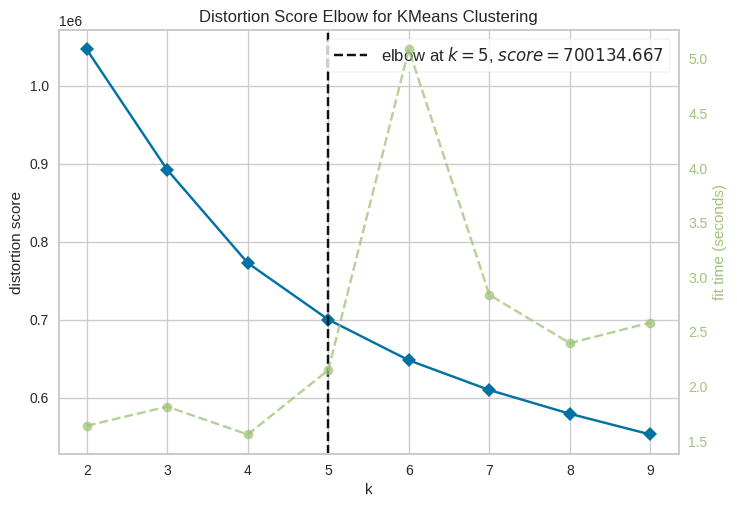

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=123, n_init=10, max_iter=100)
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(X_normalized)
visualizer.show()

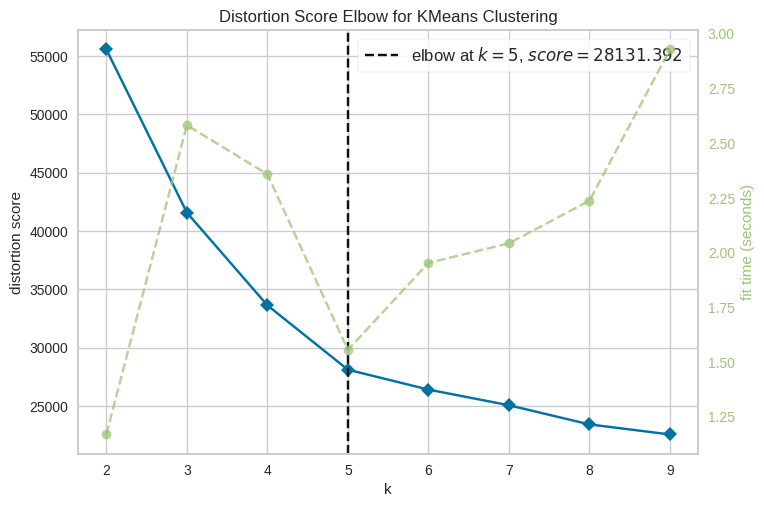

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Use the Elbow method to find the optimal number of clusters (k) with normalized data
model = KMeans(random_state=123, n_init=10, max_iter=100)
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(X_normalized_minmax)
visualizer.show()

The graph above shows the reduction of a distortion score as the number of clusters increases. The underlying algorithm suggests 5 clusters. A choice of 5 or 6 clusters seems to be fair.

Another way to choose the best number of clusters is to plot the silhouette score in a function of number of clusters.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
X_normalized.head()

latitude  longitude  avg_age_participants  males_ratio  povertyPercentage  \
0  0.477429   0.284981             -1.085051     0.608484          -0.065134   
1  0.298232  -0.344064             -0.173777     0.608484          -0.208170   
2 -0.646672  -2.098213             -1.085051     0.608484          -0.530000   
3  0.902402   0.170024              0.464116     0.608484          -0.565759   
4  0.871396   0.176539             -1.358433     0.608484          -0.100893   

   killed_ratio  injured_ratio  unharmed_ratio  candidate_winning_ratio  \
0     -0.507489       1.596518       -0.315661                -1.193710   
1     -0.507489      -0.731573       -0.315661                -0.860393   
2      2.434040      -0.731573       -0.315661                -0.767825   
3      0.473021       0.820488       -0.315661                 1.206838   
4     -0.507489       1.596518       -0.315661                 0.299618   

   males_in_month_ratio  killed_in_month_ratio  injured_in_month_ratio  \
0             -0.567662              -0.432541                0.235300   
1             -0.380815              -0.432541               -0.508382   
2              0.879980               3.479377               -0.508382   
3             -0.666735              -0.111892               -0.377625   
4             -0.760203              -0.432541               -0.381121   

   unharmed_in_month_ratio  
0                -0.278615  
1                -0.278615  
2                -0.278615  
3                -0.278615  
4                -0.278615

In [ ]:
X_normalized_minmax.head()

latitude  longitude  avg_age_participants  males_ratio  povertyPercentage  \
0  0.450468   0.719192              0.238095          1.0           0.379562   
1  0.424894   0.597439              0.396825          1.0           0.350365   
2  0.290045   0.257919              0.238095          1.0           0.284672   
3  0.511117   0.696942              0.507937          1.0           0.277372   
4  0.506692   0.698203              0.190476          1.0           0.372263   

   killed_ratio  injured_ratio  unharmed_ratio  candidate_winning_ratio  \
0      0.000000       1.000000             0.0                 0.375620   
1      0.000000       0.000000             0.0                 0.432132   
2      1.000000       0.000000             0.0                 0.447826   
3      0.333333       0.666667             0.0                 0.782615   
4      0.000000       1.000000             0.0                 0.628803   

   males_in_month_ratio  killed_in_month_ratio  injured_in_month_ratio  \
0              0.059190               0.000000                0.135417   
1              0.090476               0.000000                0.000000   
2              0.301587               0.800000                0.000000   
3              0.042601               0.065574                0.023810   
4              0.026950               0.000000                0.023173   

   unharmed_in_month_ratio  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

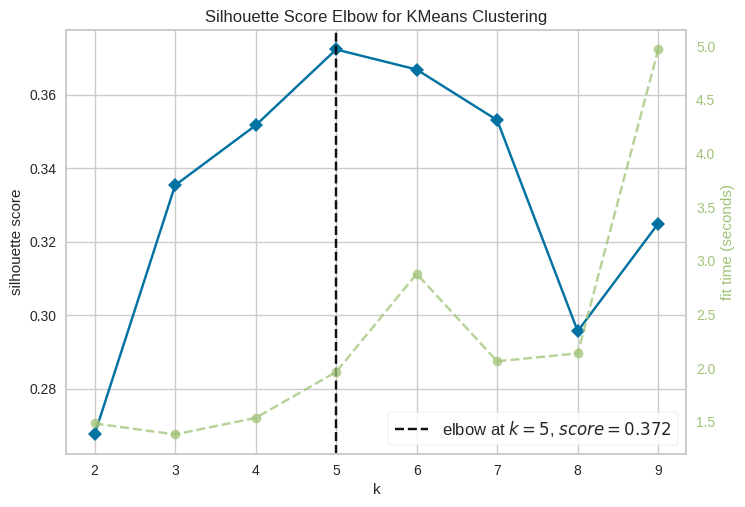

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X_normalized_minmax)
visualizer.show()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

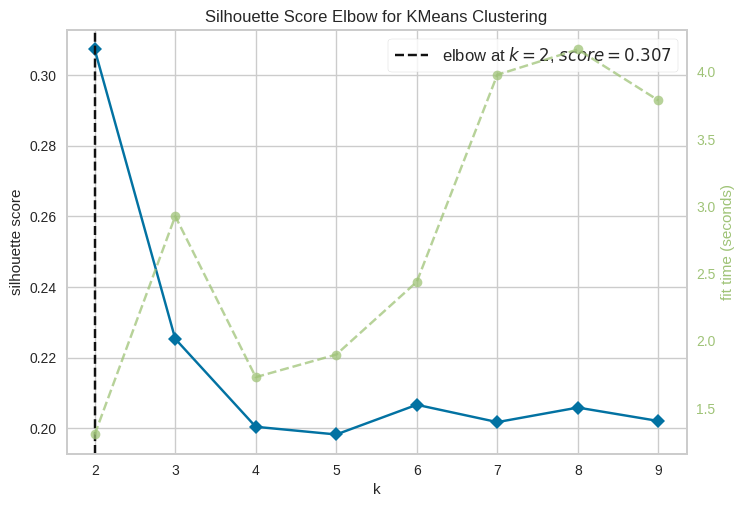

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X_normalized)
visualizer.show()
plt.show()

Using the standard scaler gives a lower sihouette score so we use the the minmax scaler

### Setting Optimal K value

In [ ]:
k_optimal = 5

## Characterization of Obtained Clusters

In [ ]:
# Perform K-means clustering with the optimal k value
kmeans = KMeans(n_clusters=k_optimal)
kmeans.fit(X_normalized_minmax)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
labels

array([2, 4, 0, ..., 3, 2, 2], dtype=int32)

In [ ]:
X_normalized_minmax['labels'] = labels

In [ ]:
X_normalized_minmax.to_csv('data/dataset_kmeans_5clusters.csv', index=False)

In [ ]:
# Print length of each obtained cluster
for k in range(k_optimal):
    cluster_data = X_normalized_minmax[labels == k]
    print(f"Cluster {k + 1}: {len(cluster_data)}")

Cluster 1: 17901
Cluster 2: 8614
Cluster 3: 28351
Cluster 4: 17406
Cluster 5: 21076


Cluster 1
           latitude     longitude  avg_age_participants   males_ratio  \
count  17901.000000  17901.000000          17901.000000  17901.000000   
mean       0.353579      0.642825              0.434525      0.918249   
std        0.135973      0.194249              0.173805      0.226254   
min        0.027313      0.154588              0.126984      0.000000   
25%        0.246919      0.585972              0.301587      1.000000   
50%        0.375215      0.697380              0.396825      1.000000   
75%        0.454858      0.766240              0.539683      1.000000   
max        0.715833      0.989424              1.000000      1.000000   

       povertyPercentage  killed_ratio  injured_ratio  unharmed_ratio  \
count       17901.000000  17901.000000   17901.000000    17901.000000   
mean            0.426236      0.806594       0.041208        0.000028   
std             0.211073      0.251865       0.135195        0.003737   
min             0.000000      0.250000  

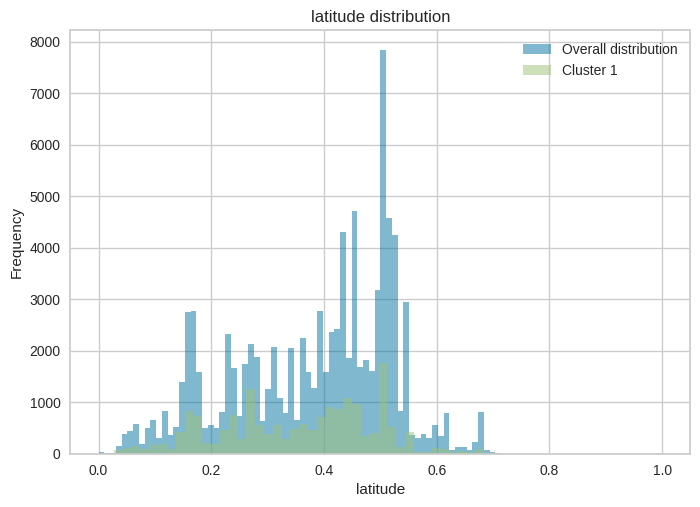

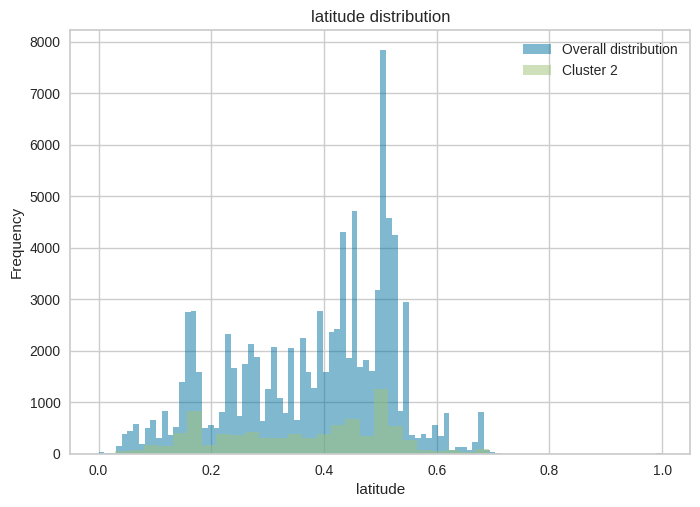

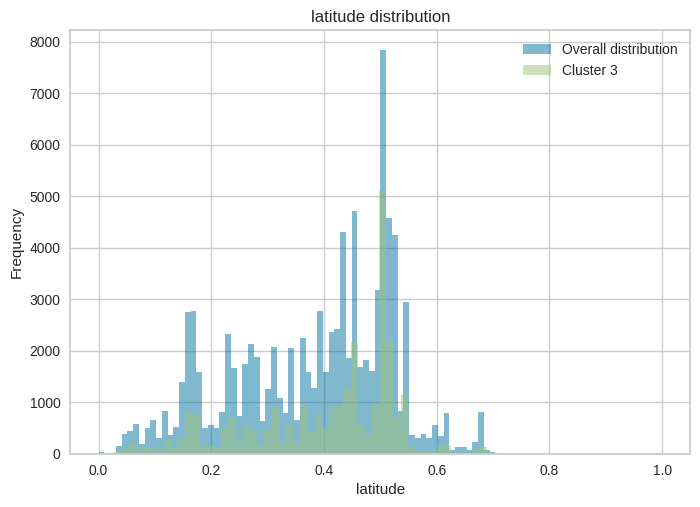

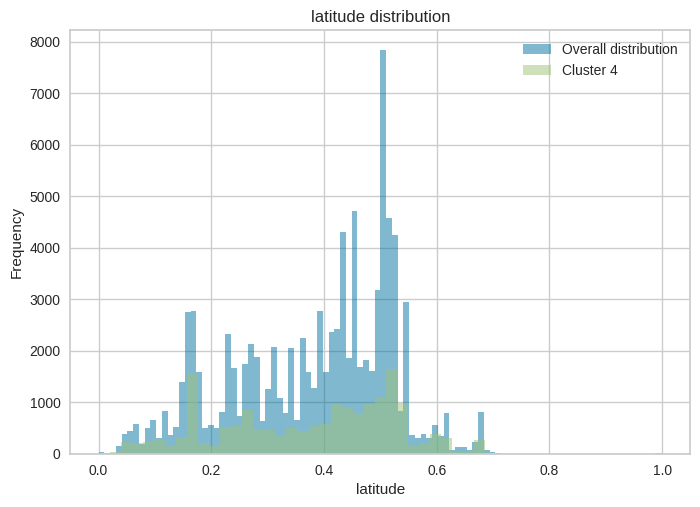

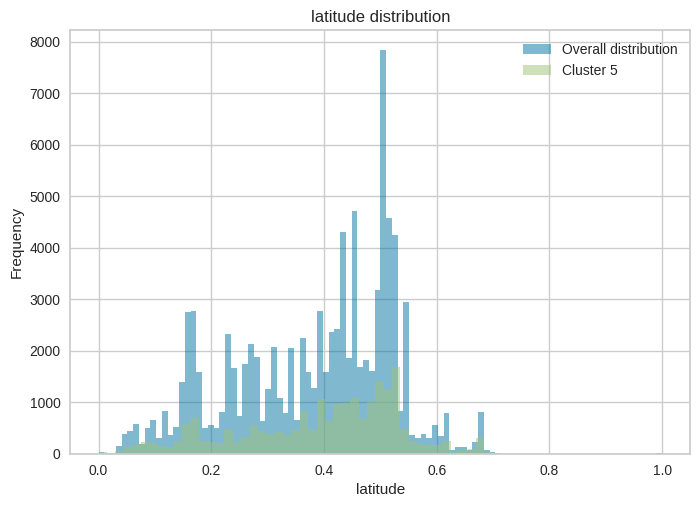

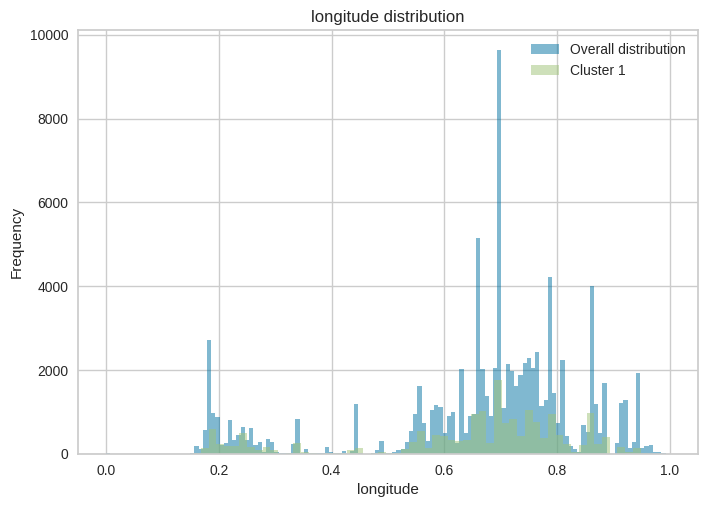

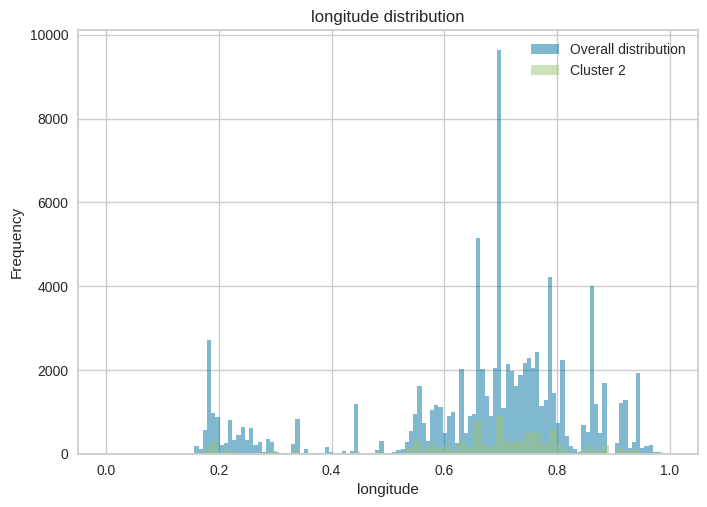

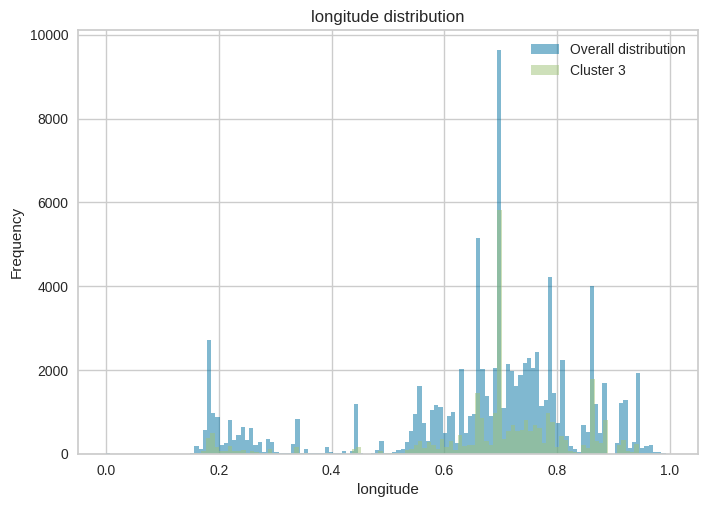

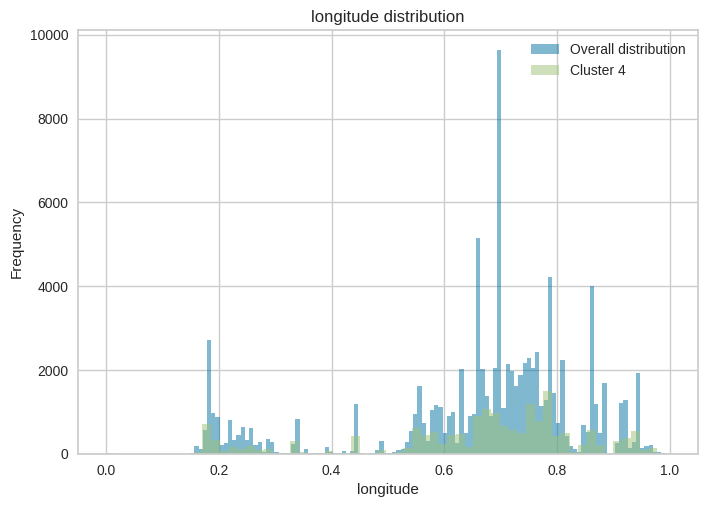

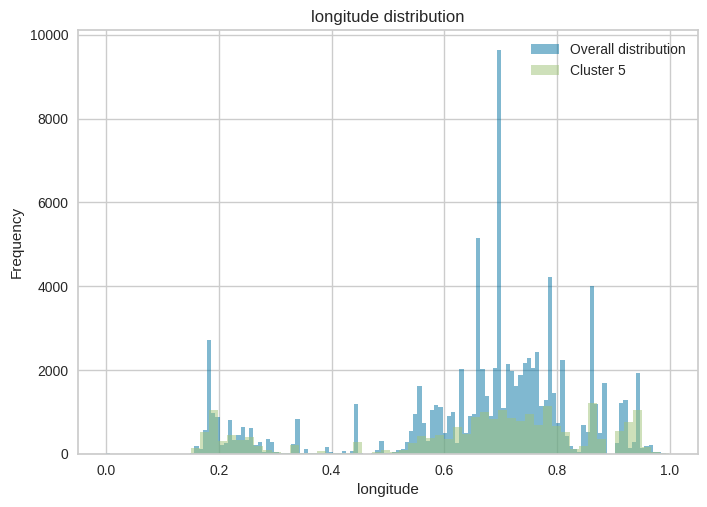

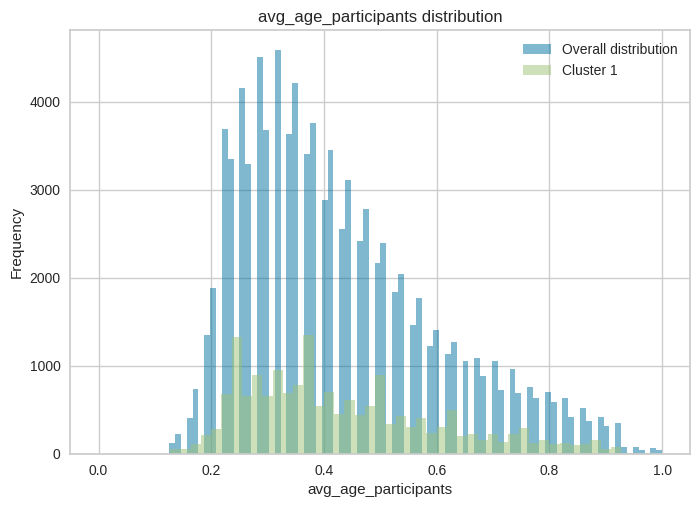

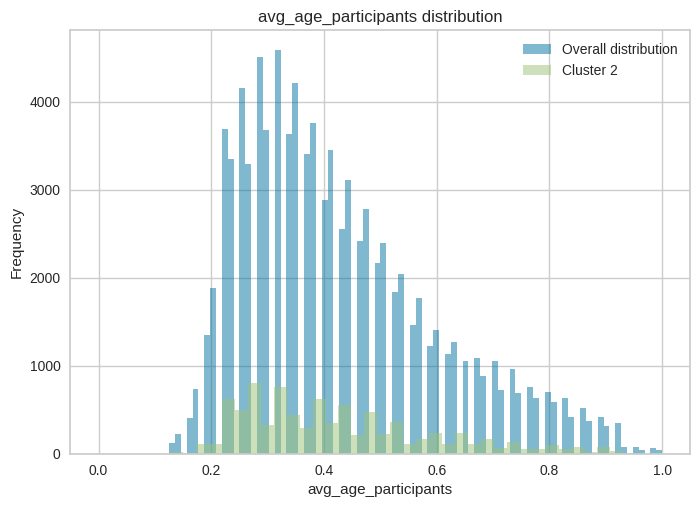

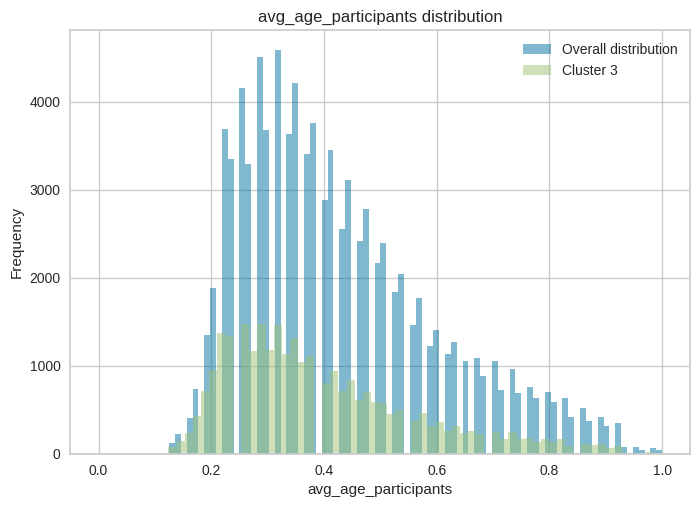

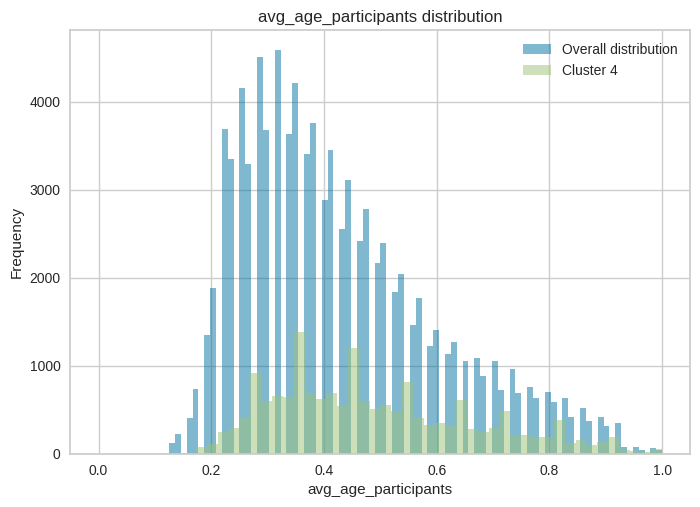

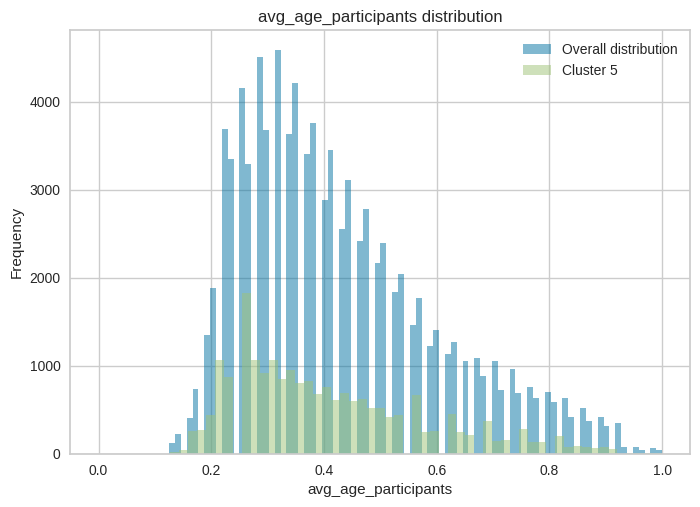

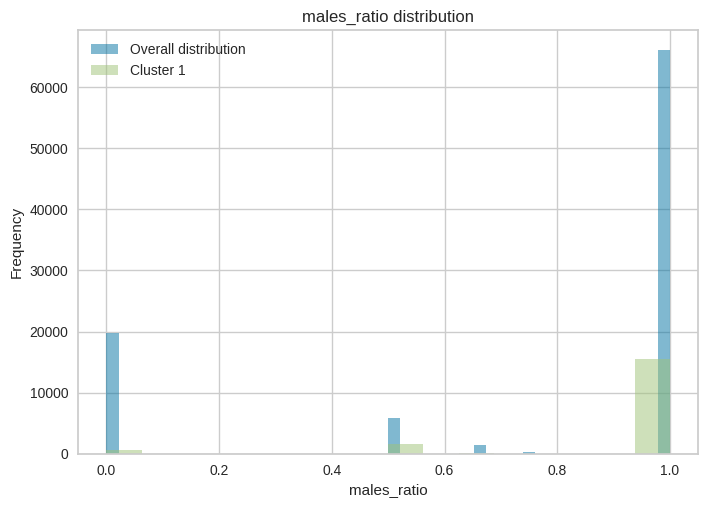

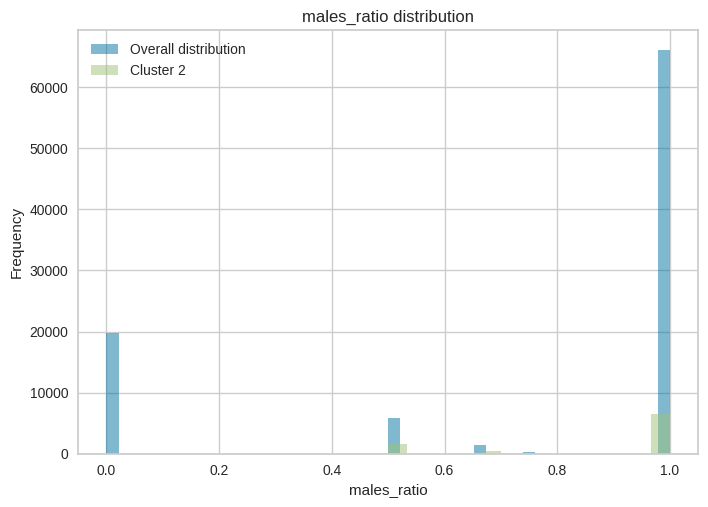

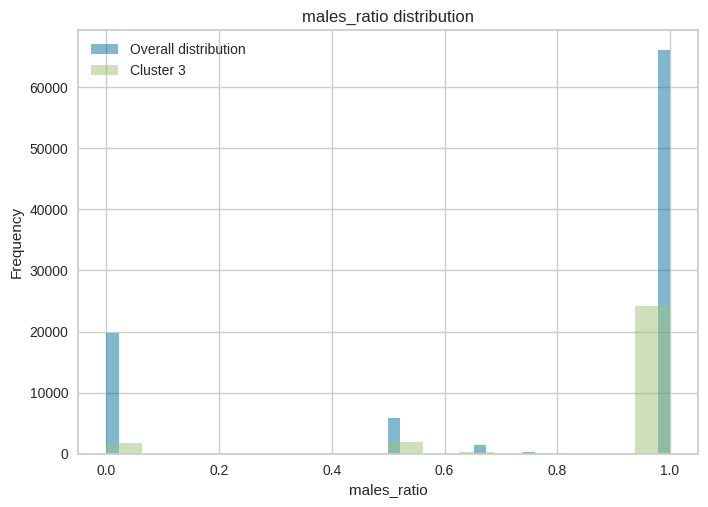

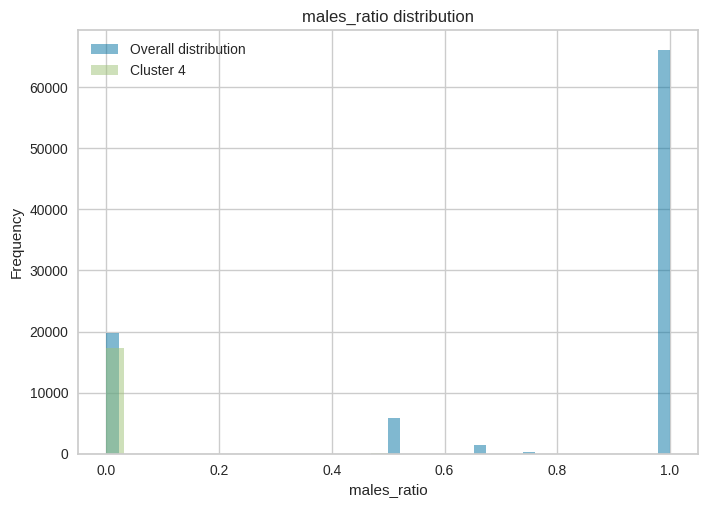

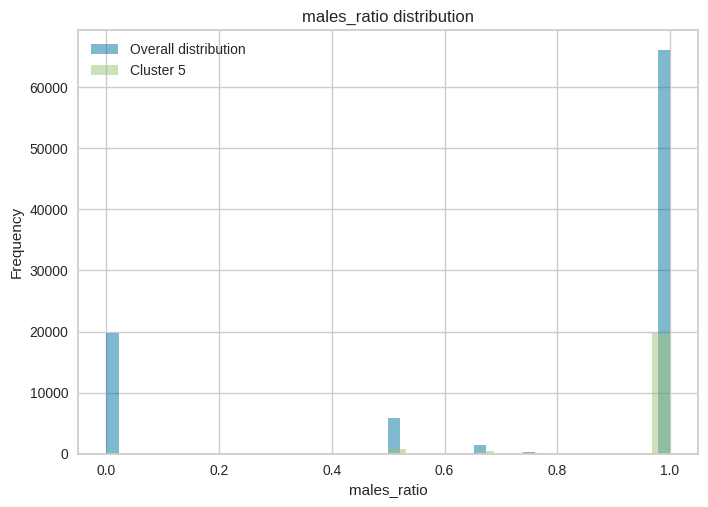

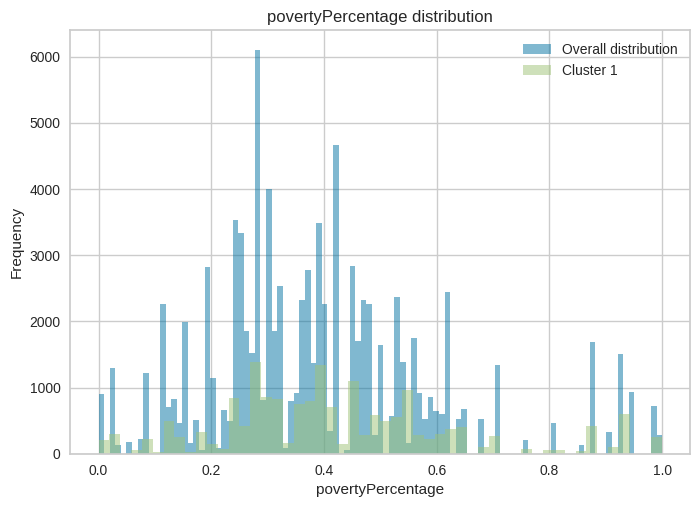

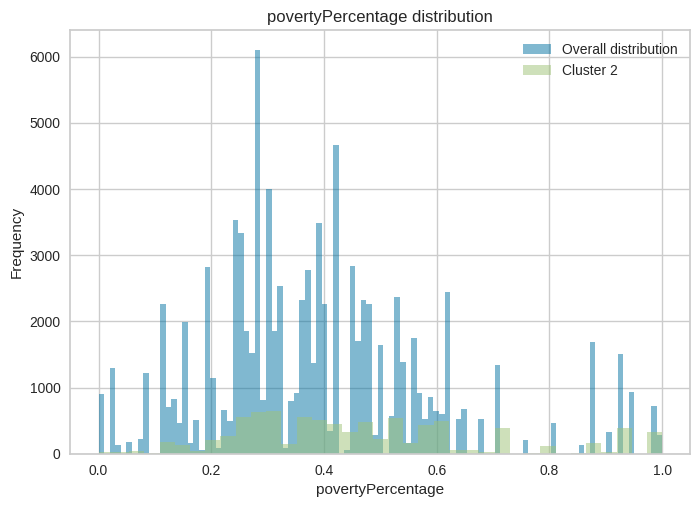

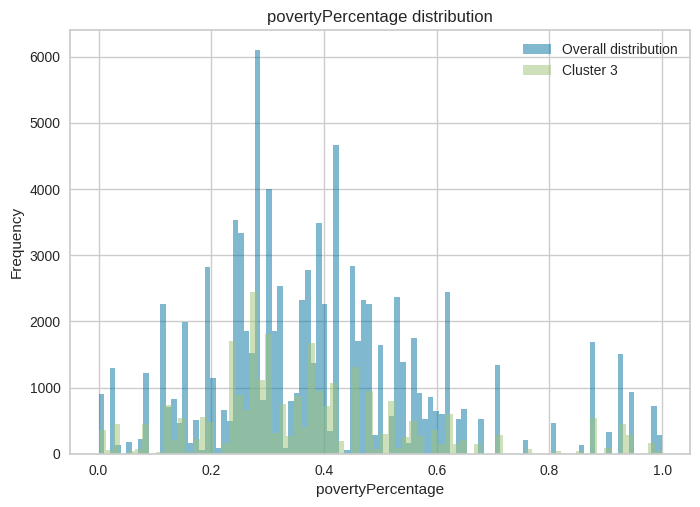

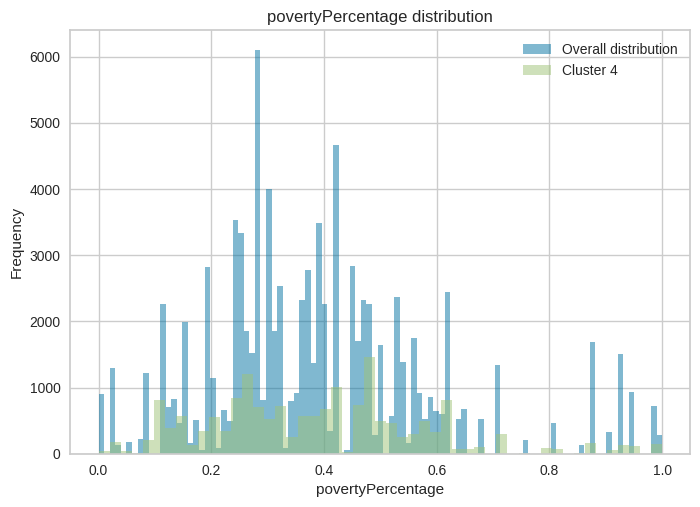

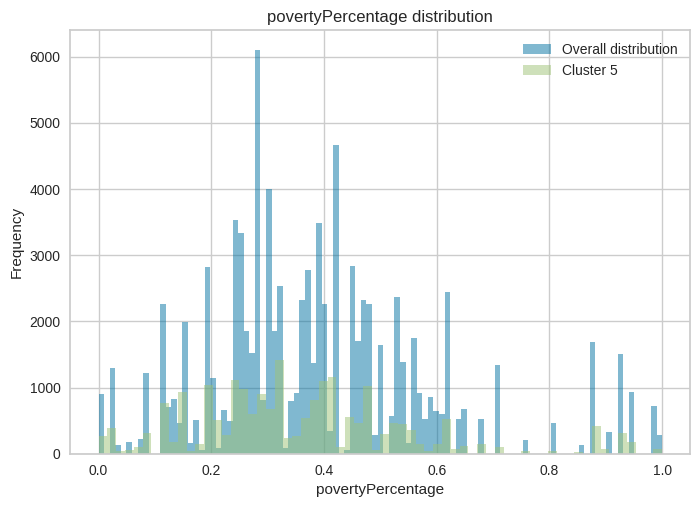

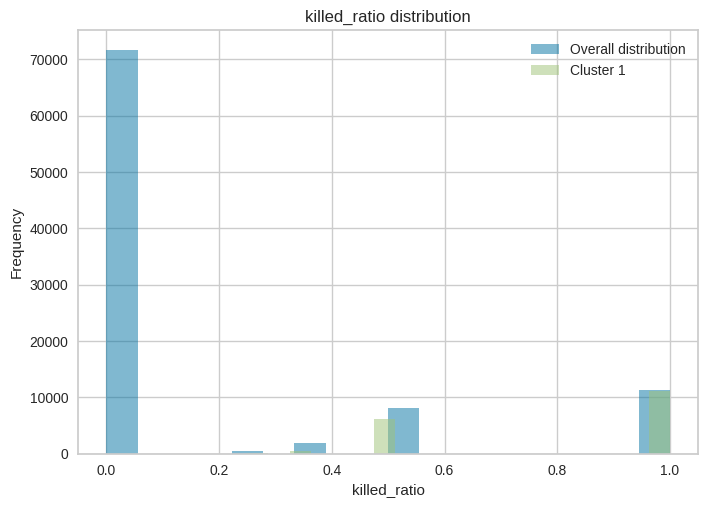

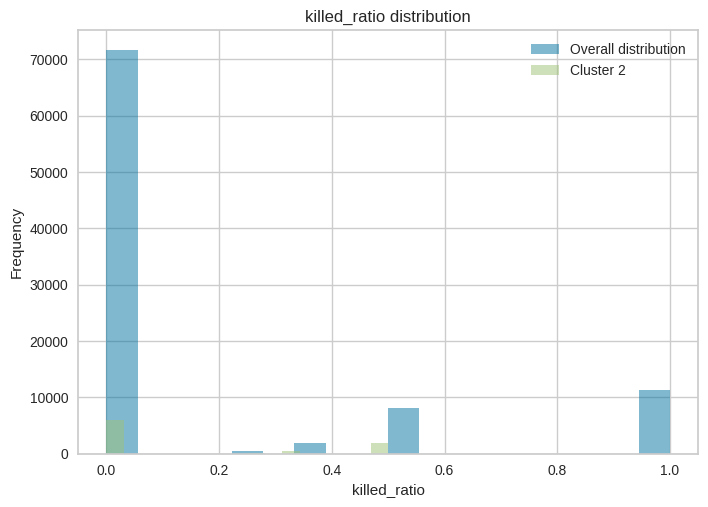

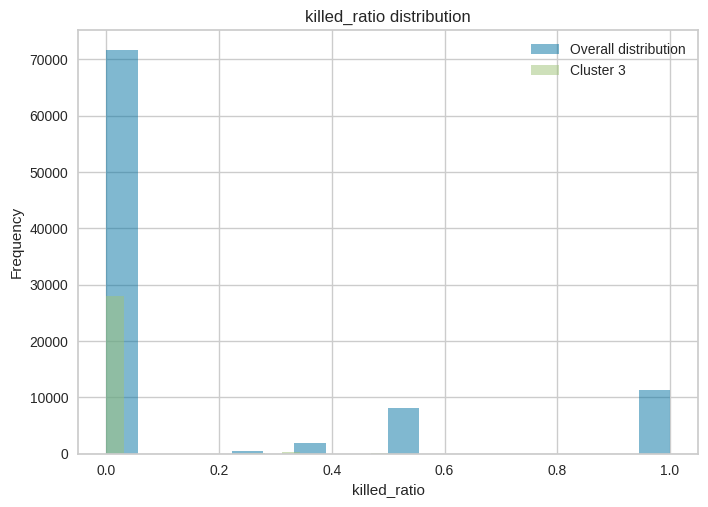

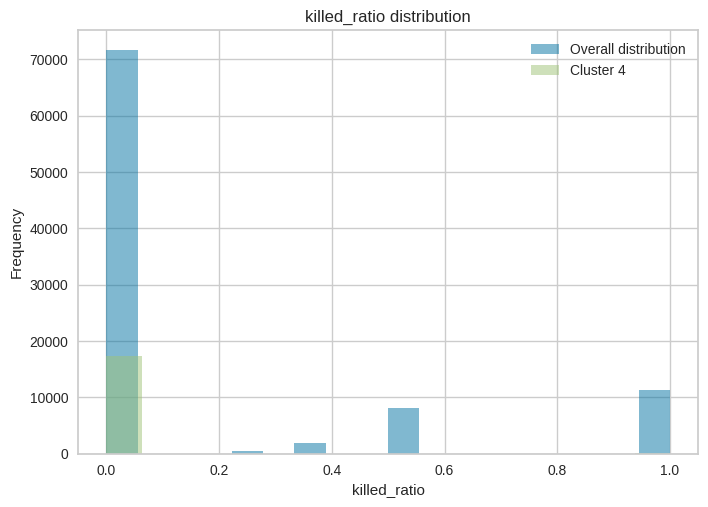

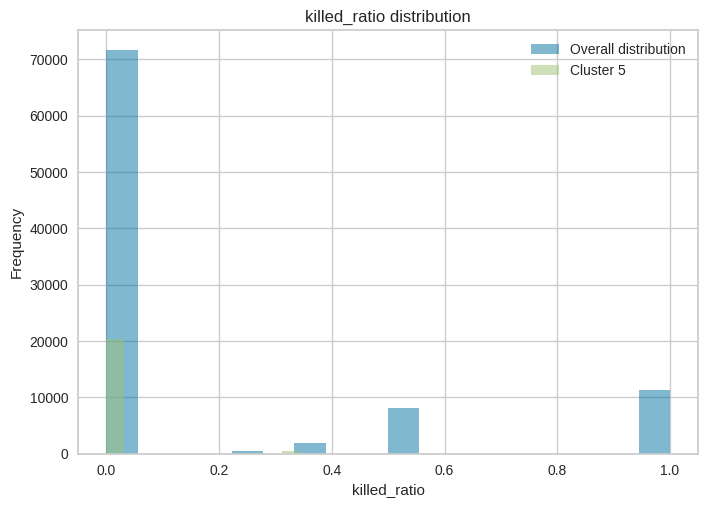

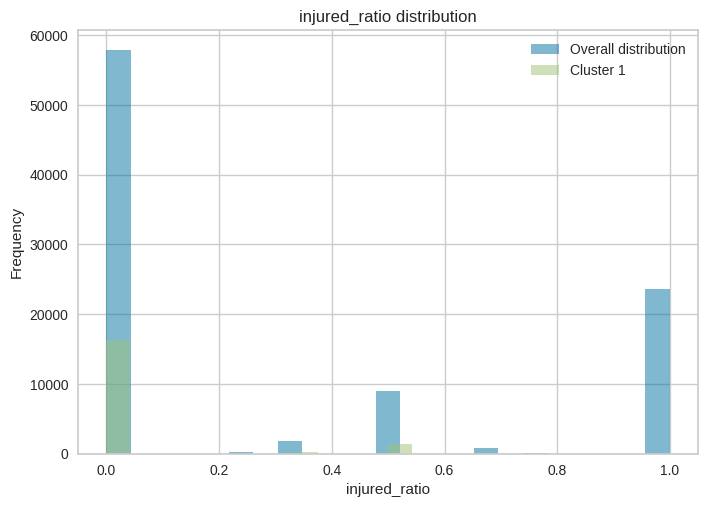

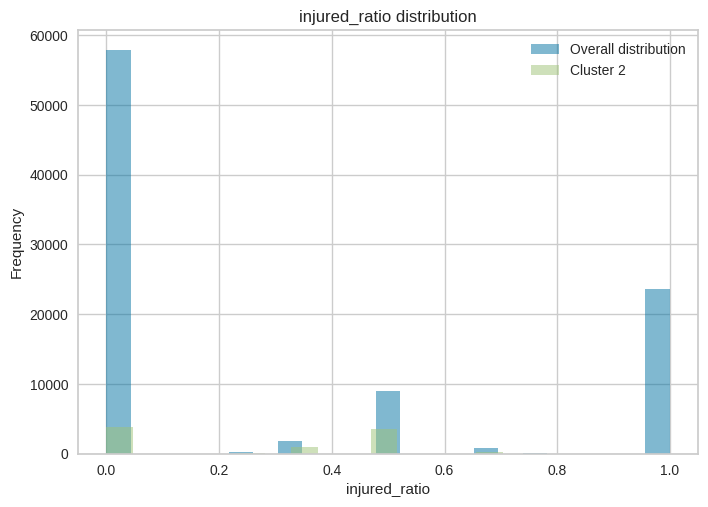

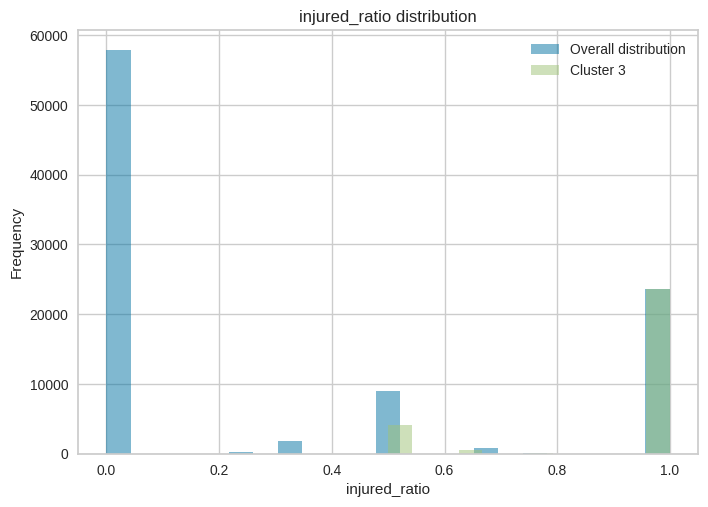

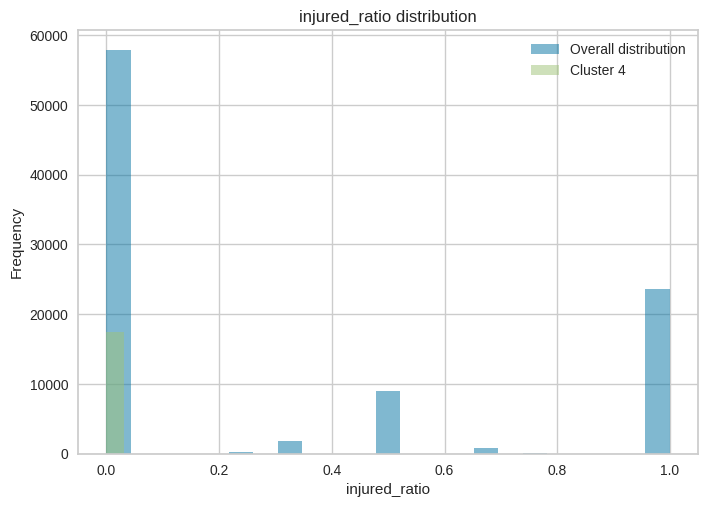

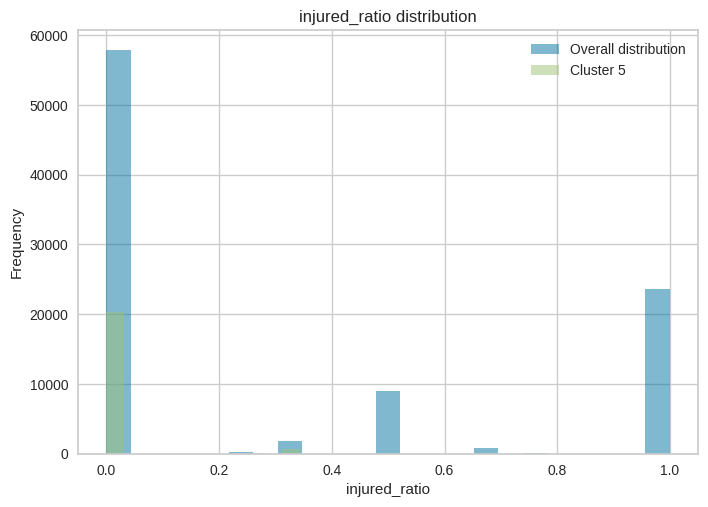

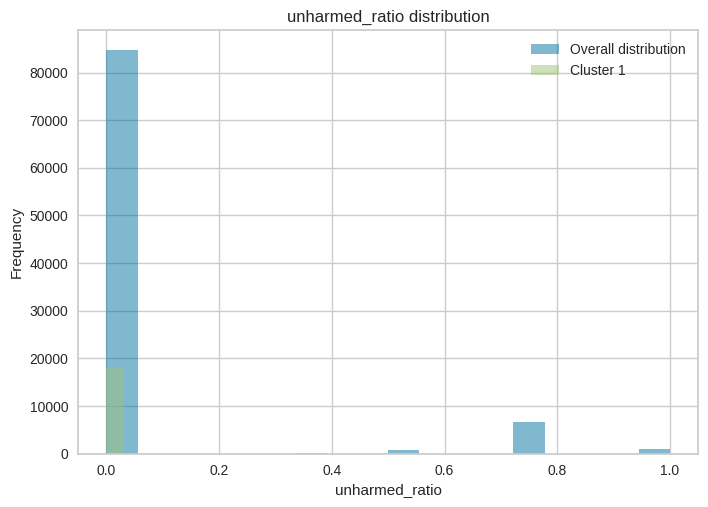

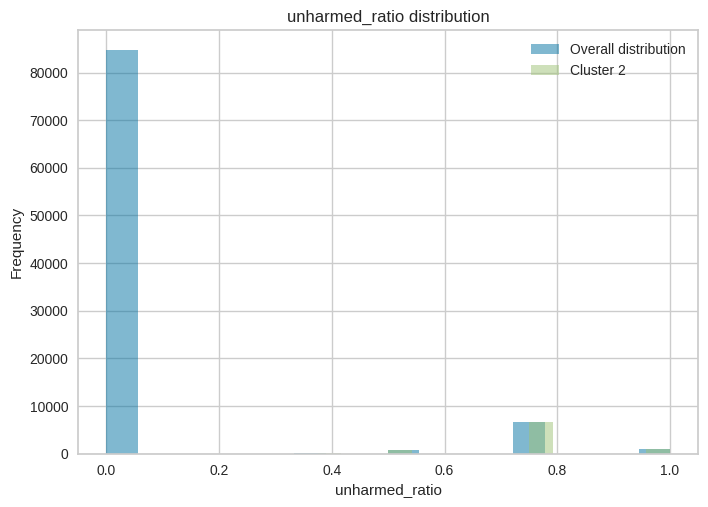

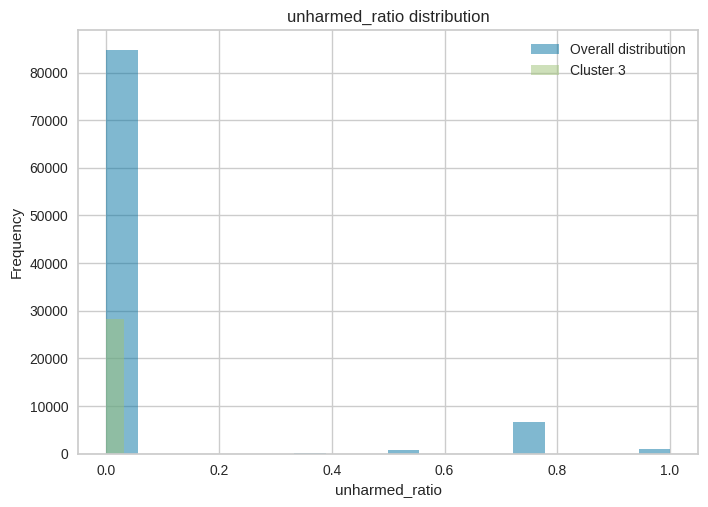

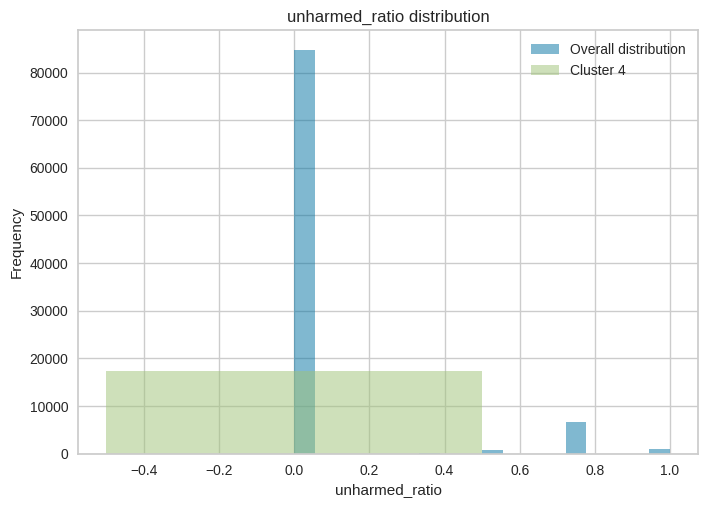

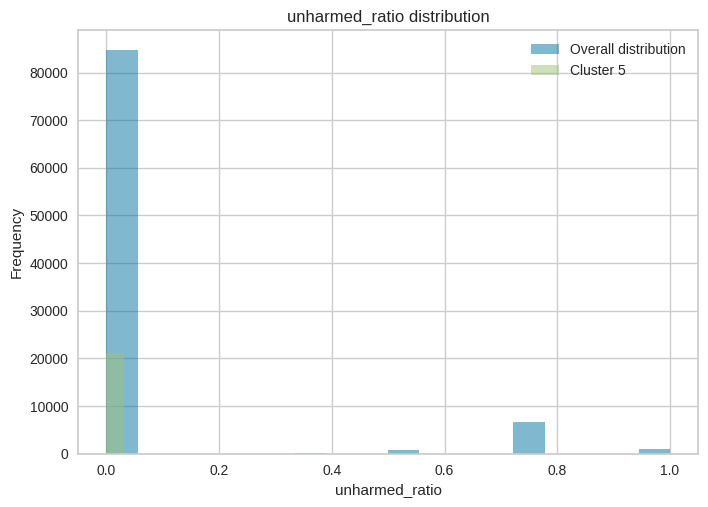

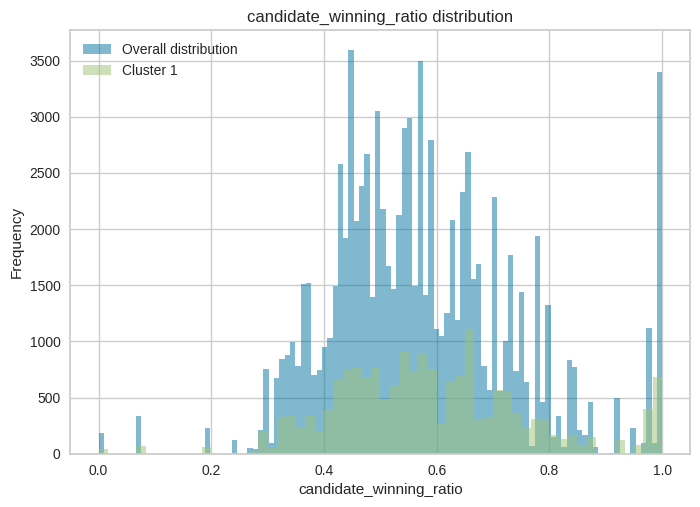

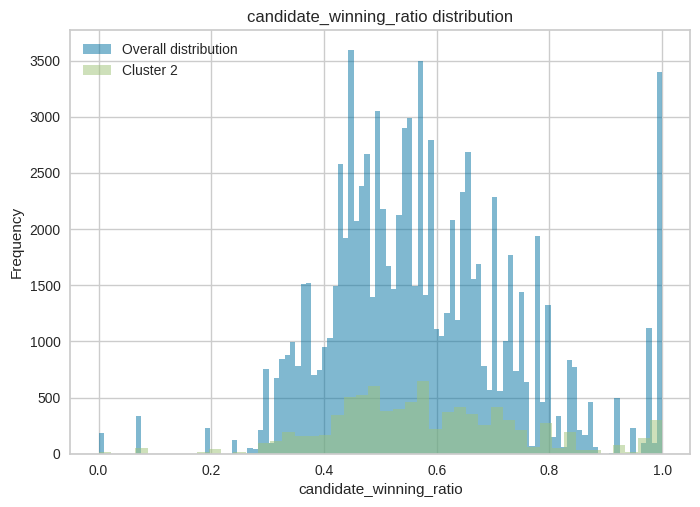

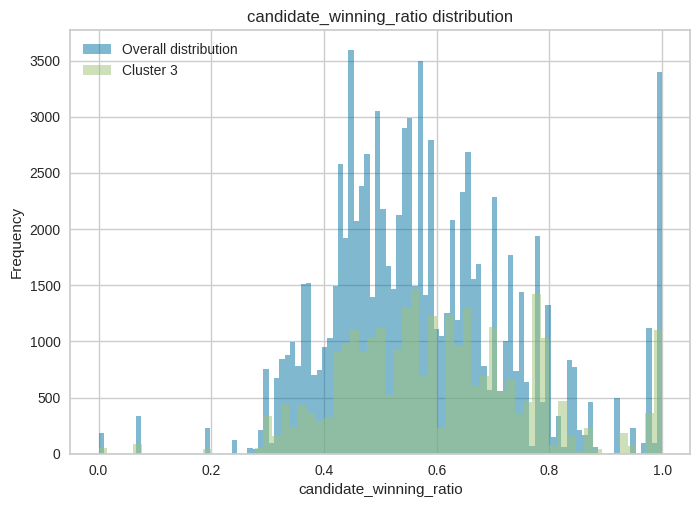

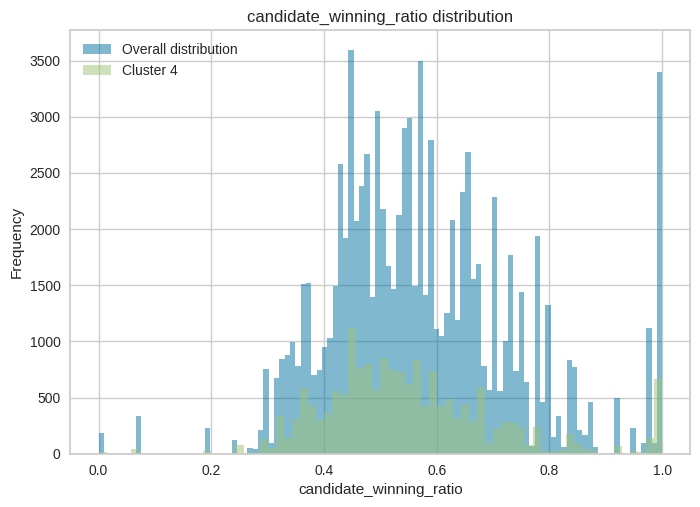

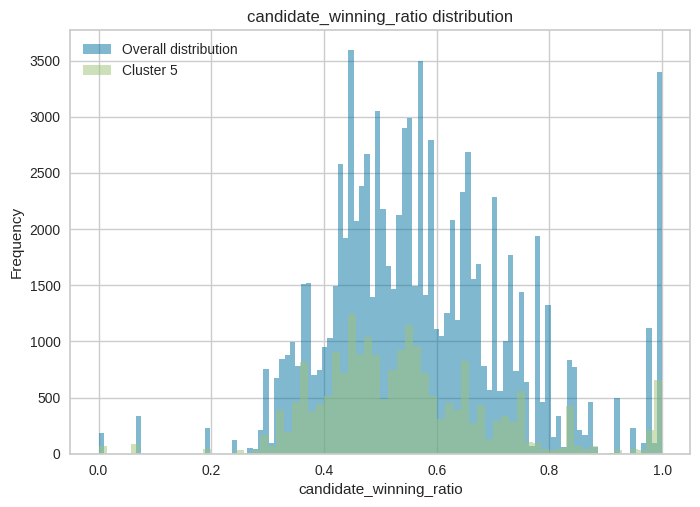

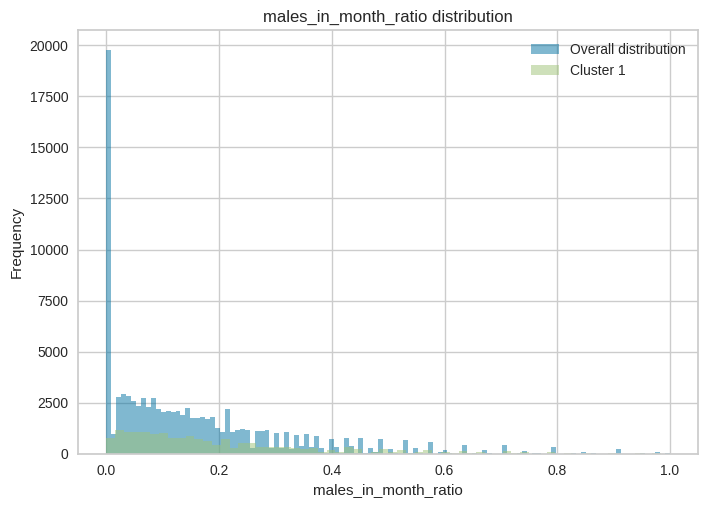

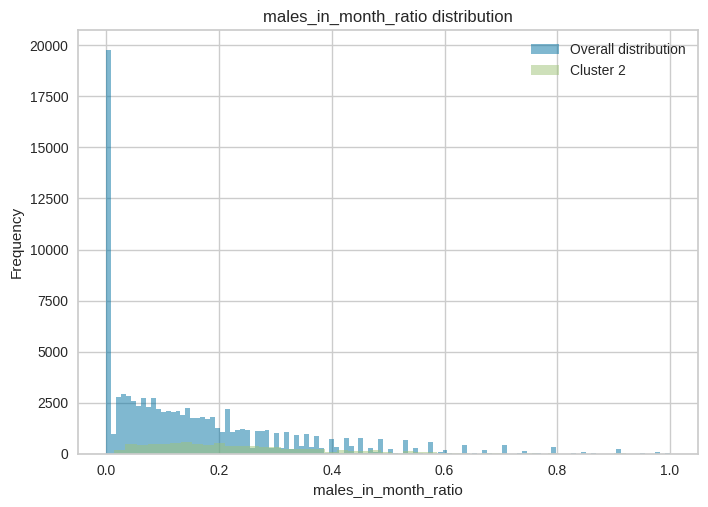

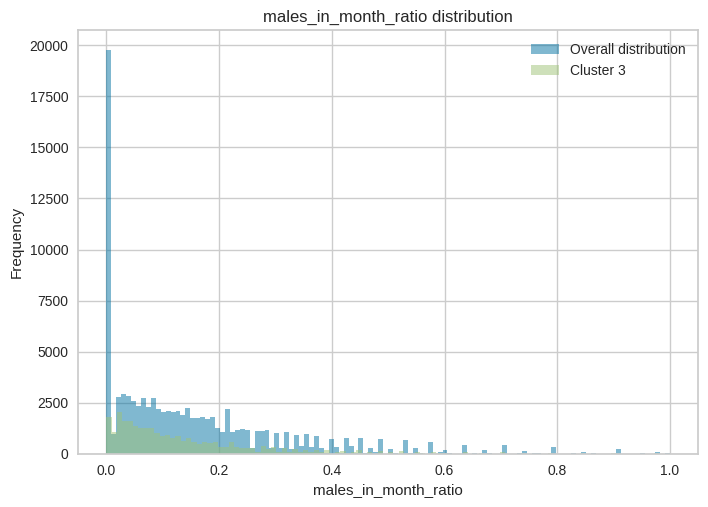

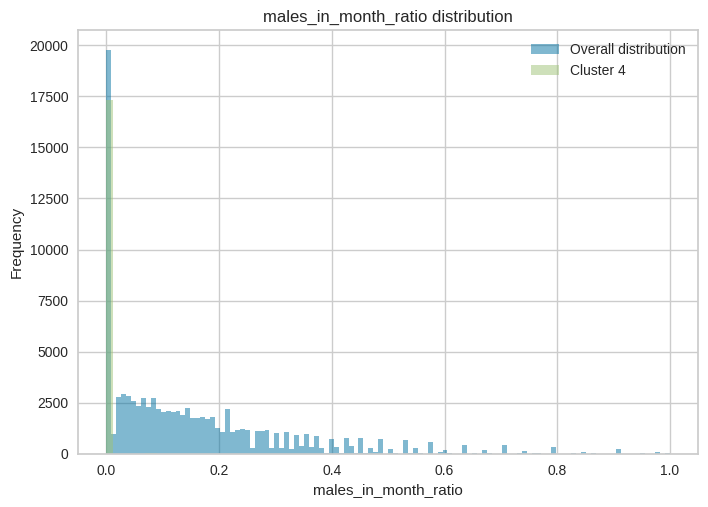

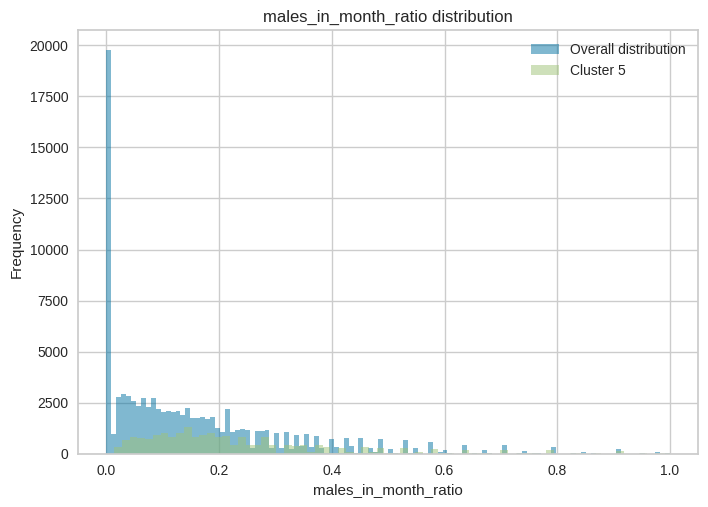

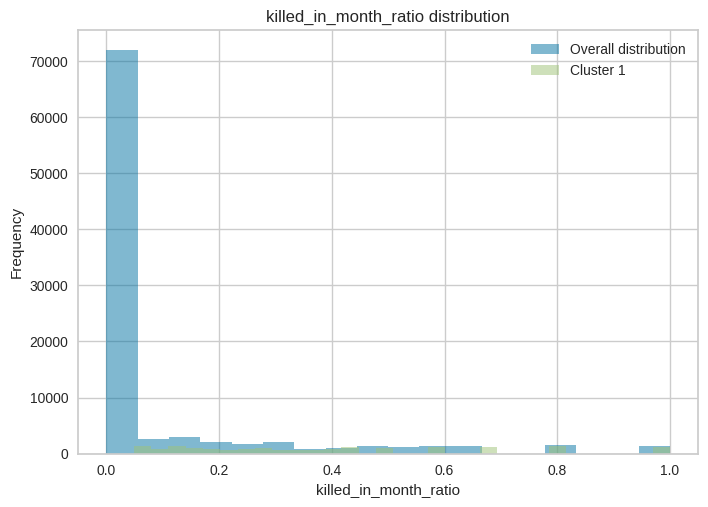

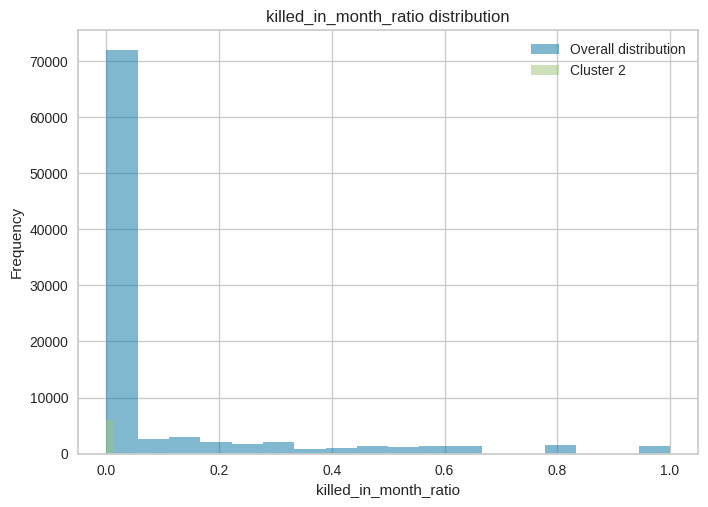

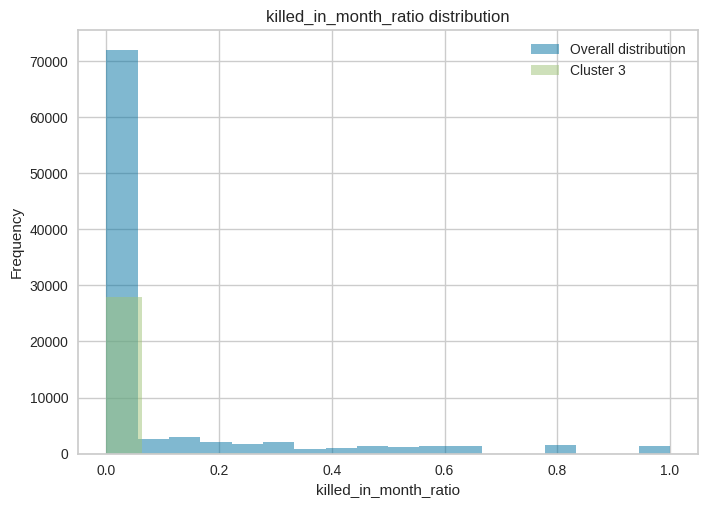

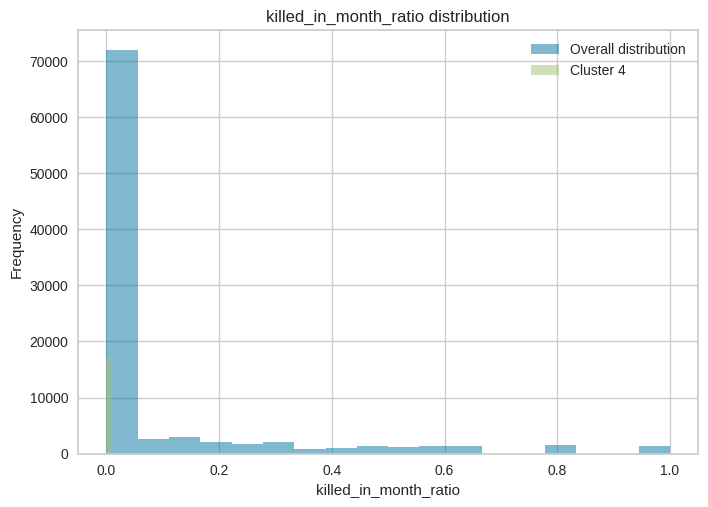

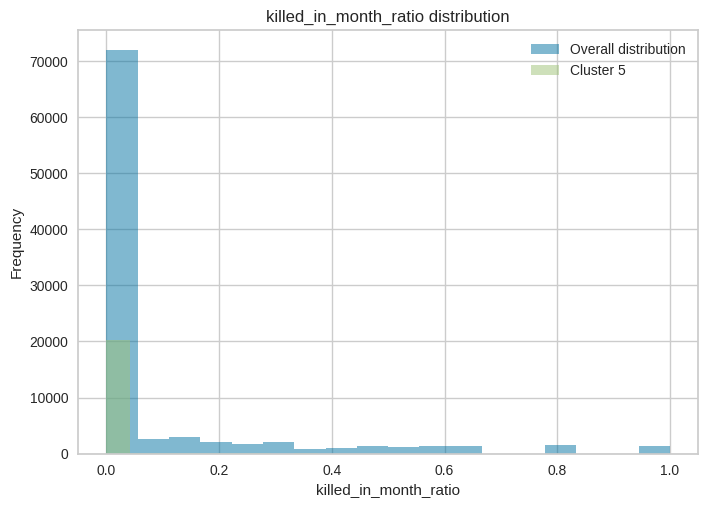

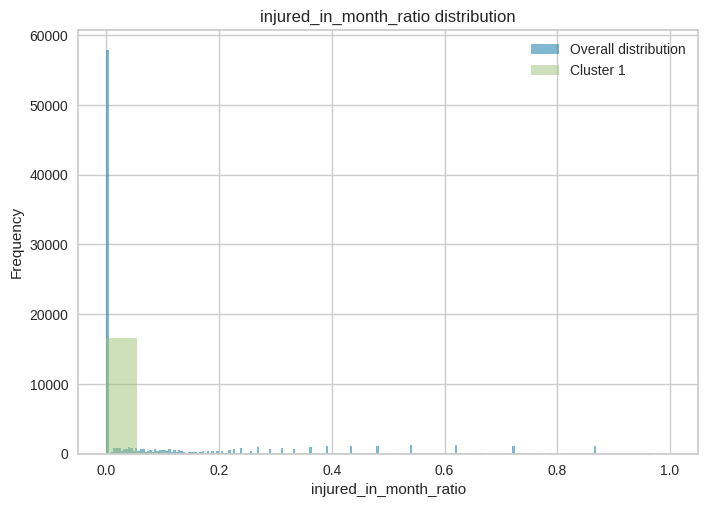

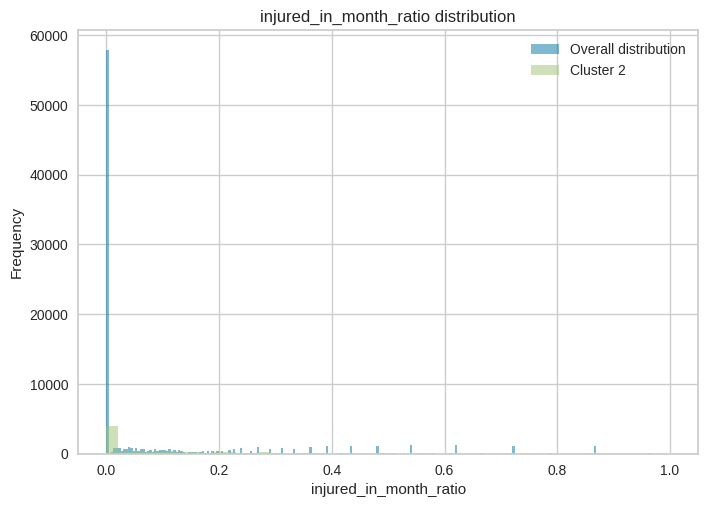

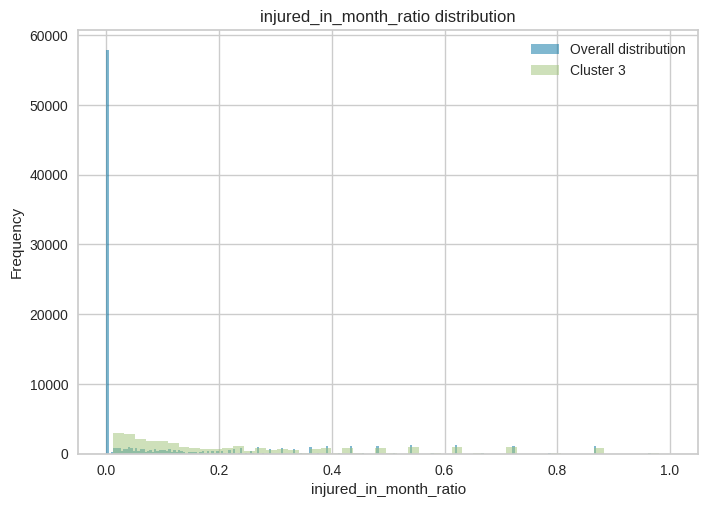

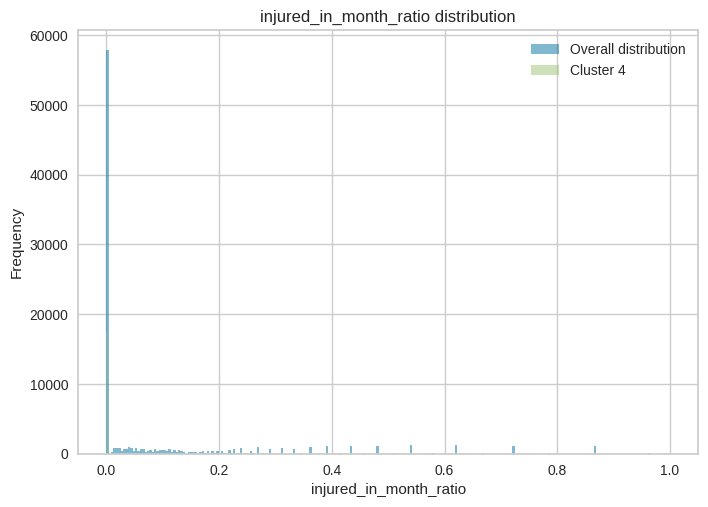

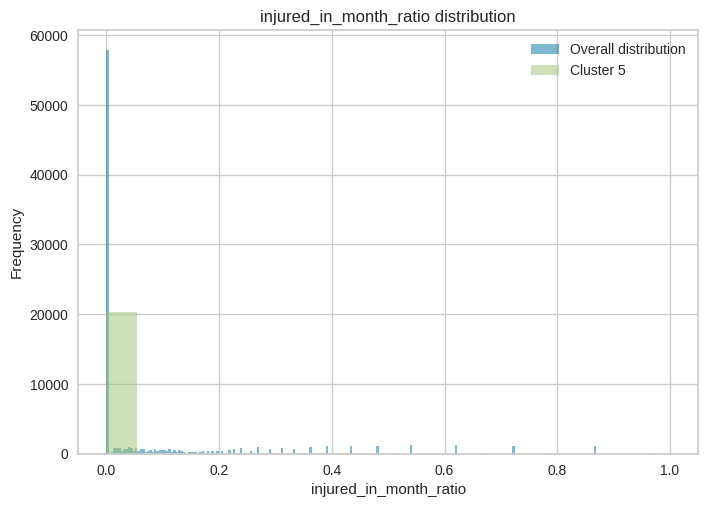

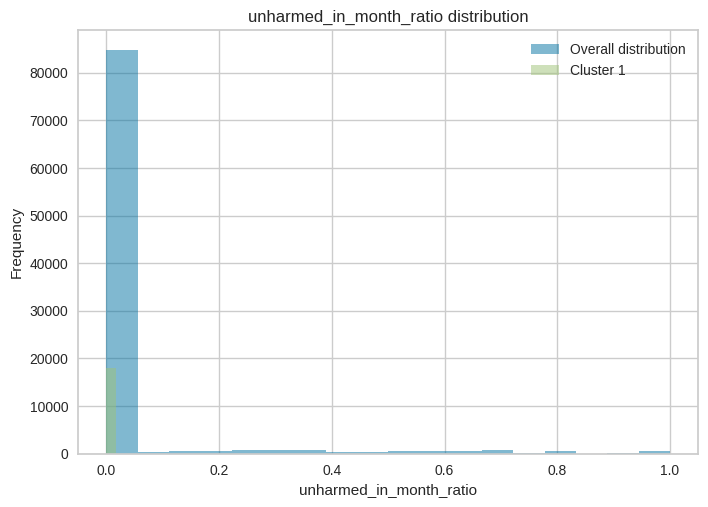

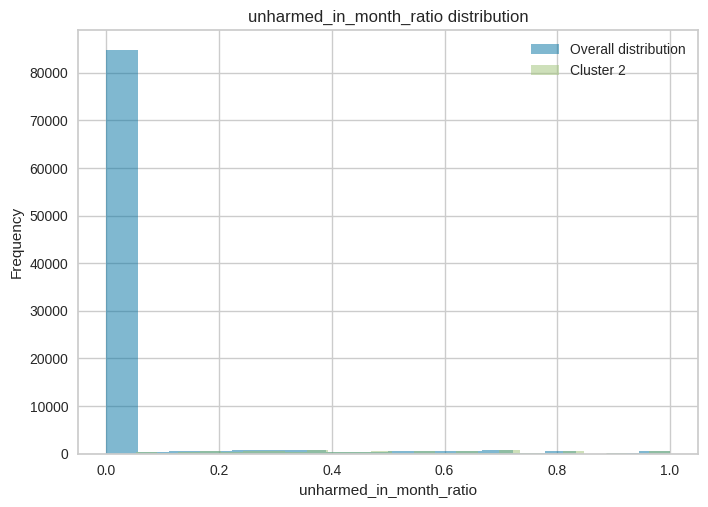

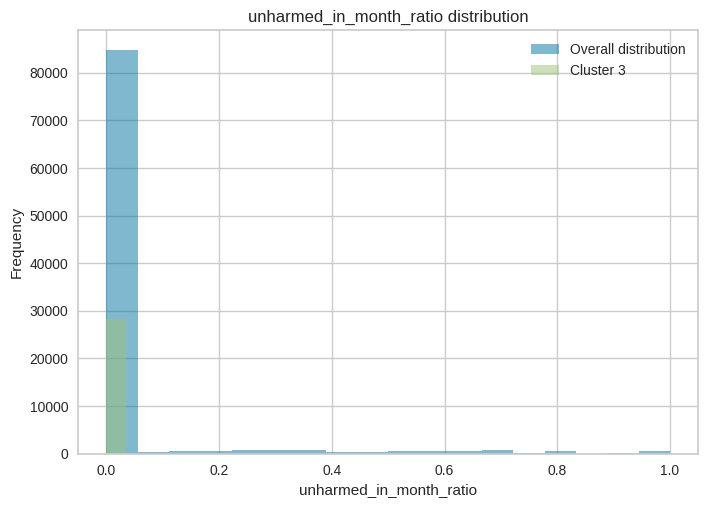

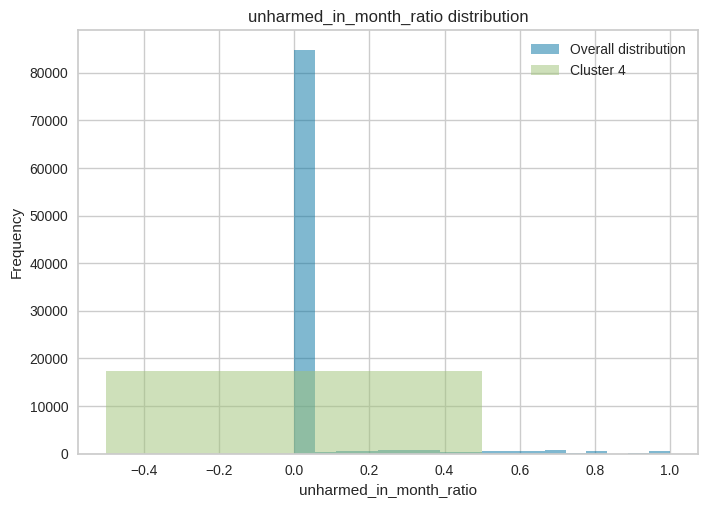

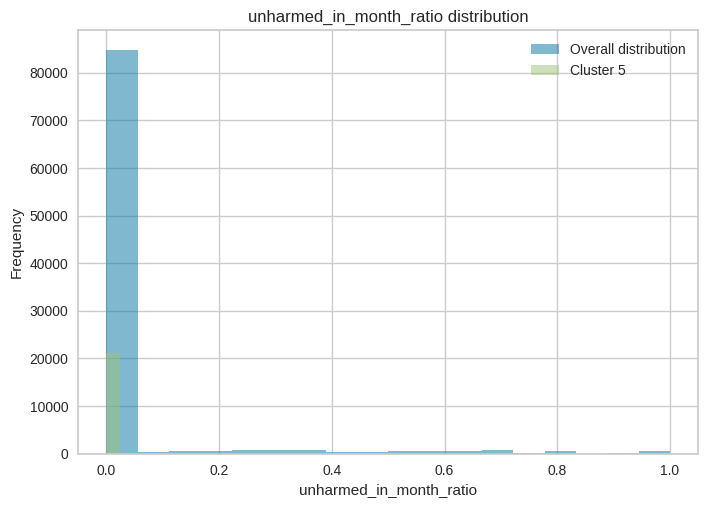

In [ ]:
# Analyze the obtained clusters by calculating summary statistics for each variable within each cluster
for k in range(k_optimal):
    cluster_data = X_normalized_minmax[labels == k]
    print('Cluster', k + 1)
    print(cluster_data.describe())

# Compare the distribution of variables within each cluster to the overall distribution of the variables in the entire dataset
for col in X_normalized_minmax.columns:
    if col != 'labels':
      all_data = X_normalized_minmax[col]
      for k in range(k_optimal):
          cluster_data = X_normalized_minmax[labels == k][col]
          plt.hist(all_data, bins='auto', alpha=0.5, label='Overall distribution')
          plt.hist(cluster_data, bins='auto', alpha=0.5, label=f'Cluster {k + 1}')
          plt.title(f'{col} distribution')
          plt.xlabel(col)
          plt.ylabel('Frequency')
          plt.legend()
          plt.show()


## Evaluation of Clustering Results for K=5

In [ ]:
X_normalized_minmax.drop(columns=['labels'], inplace=True)

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calculate silhouette score
silhouette_score_val = silhouette_score(X_normalized_minmax, labels)
print(f'Silhouette score: {silhouette_score_val:.2f}')

# Calculate Calinski-Harabasz score
calinski_harabasz_score_val = calinski_harabasz_score(X_normalized_minmax, labels)
print(f'Calinski-Harabasz score: {calinski_harabasz_score_val:.2f}')

Silhouette score: 0.37
Calinski-Harabasz score: 38824.70


### Try Different Values of  K

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1
           latitude     longitude  avg_age_participants   males_ratio  \
count  21104.000000  21104.000000          21104.000000  21104.000000   
mean       0.393934      0.649736              0.411554      0.972790   
std        0.143457      0.228742              0.165241      0.106472   
min        0.000068      0.150573              0.079365      0.500000   
25%        0.294734      0.577960              0.285714      1.000000   
50%        0.427023      0.700458              0.380952      1.000000   
75%        0.503416      0.800011              0.507937      1.000000   
max        0.714179      0.999523              1.000000      1.000000   

       povertyPercentage  killed_ratio  injured_ratio  unharmed_ratio  \
count       21104.000000  21104.000000   21104.000000    21104.000000   
mean            0.361816      0.011329       0.012158        0.000450   
std             0.196814      0.059052       0.061334        0.013433   
min             0.000000      0.000000  

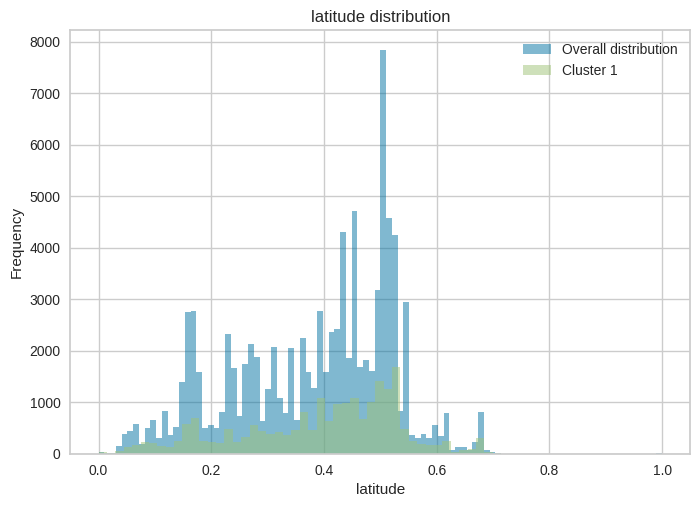

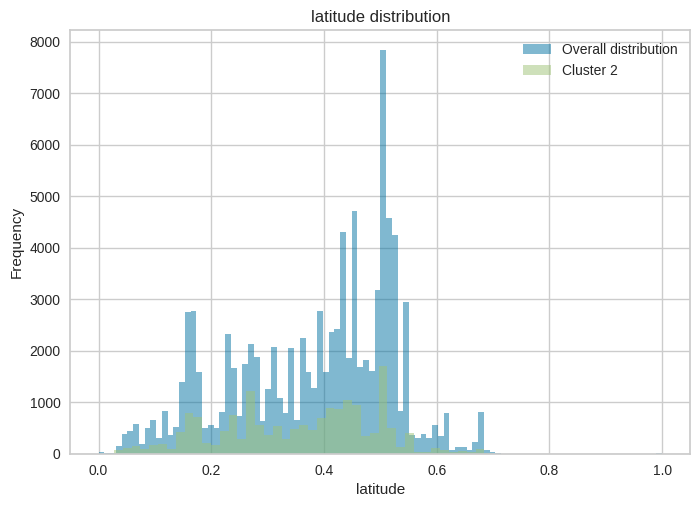

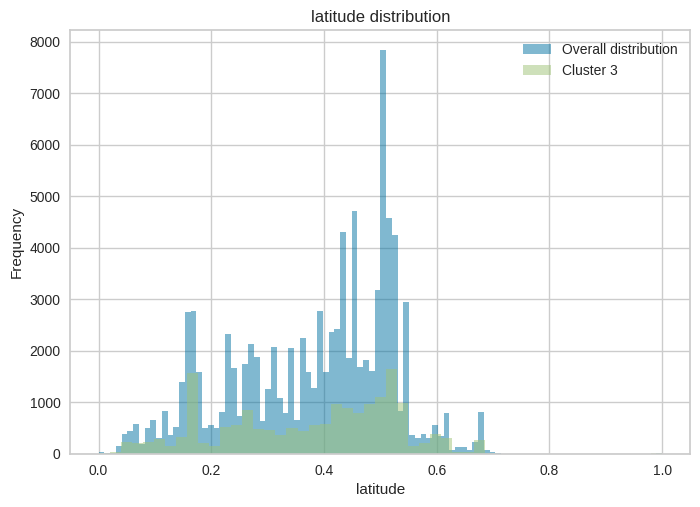

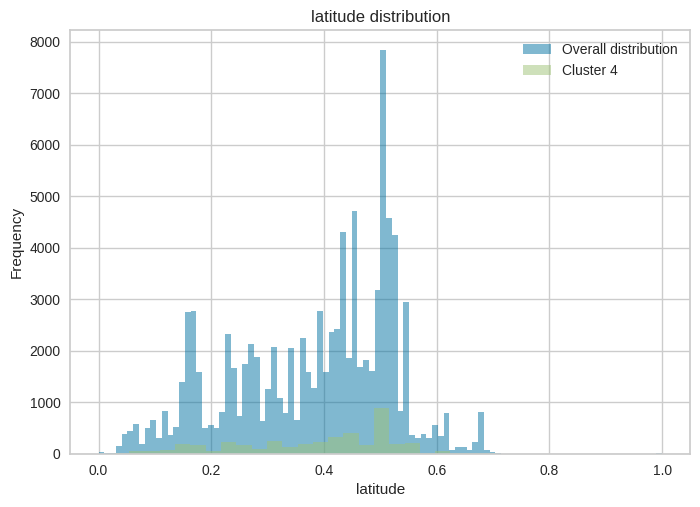

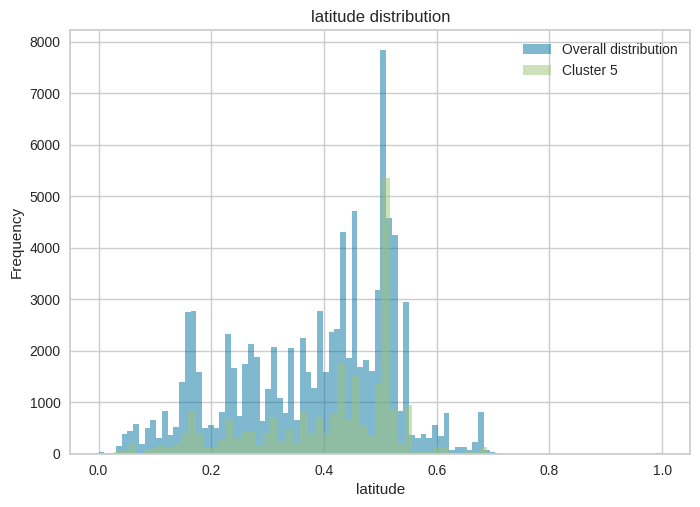

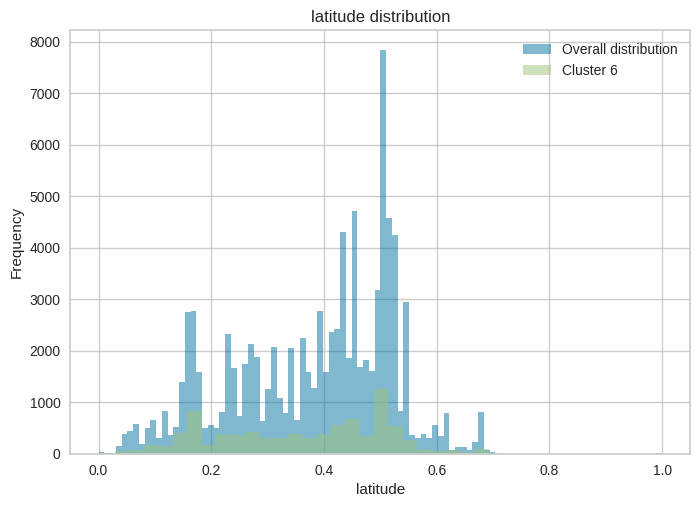

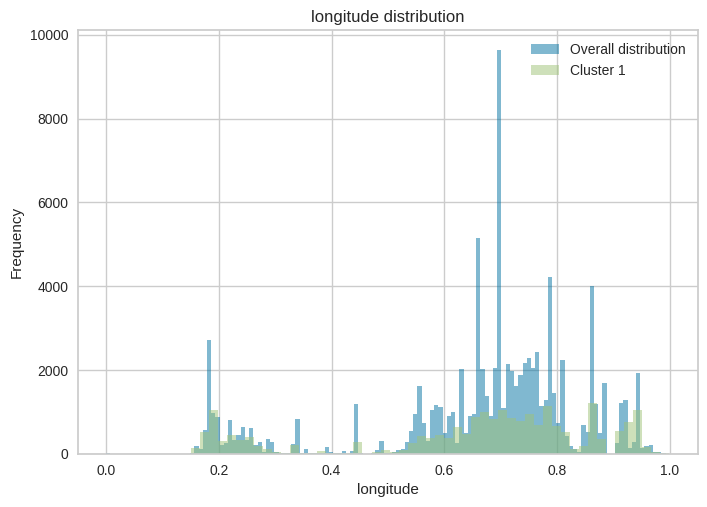

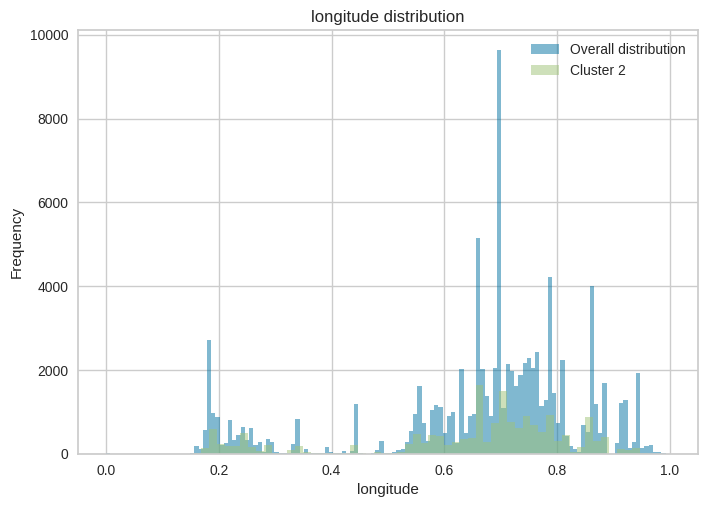

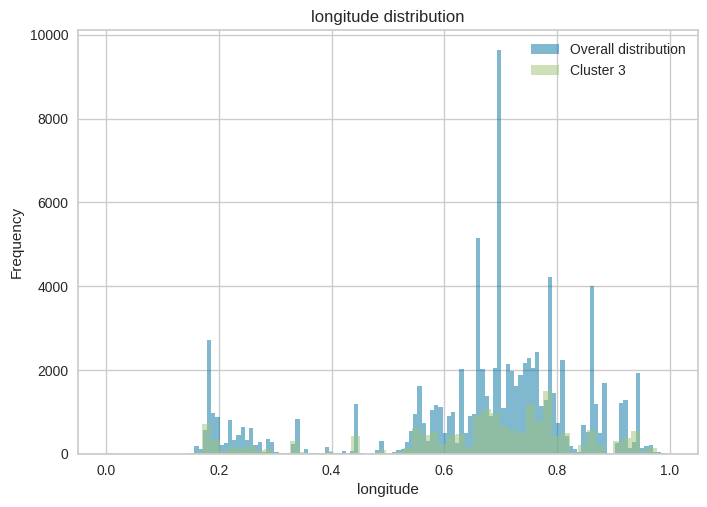

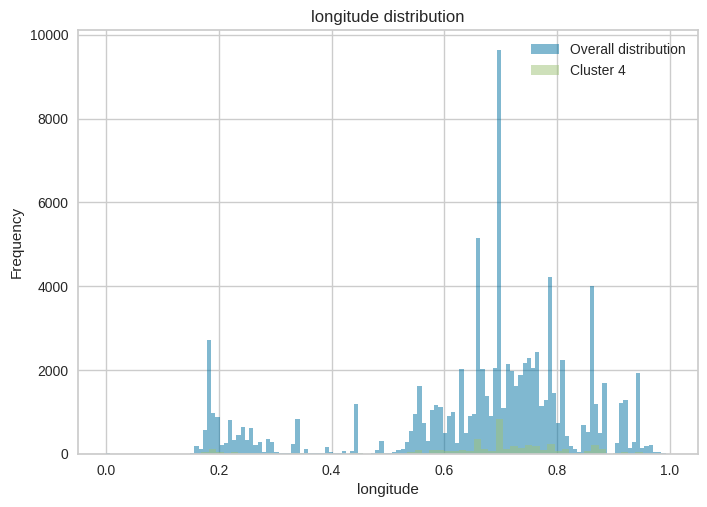

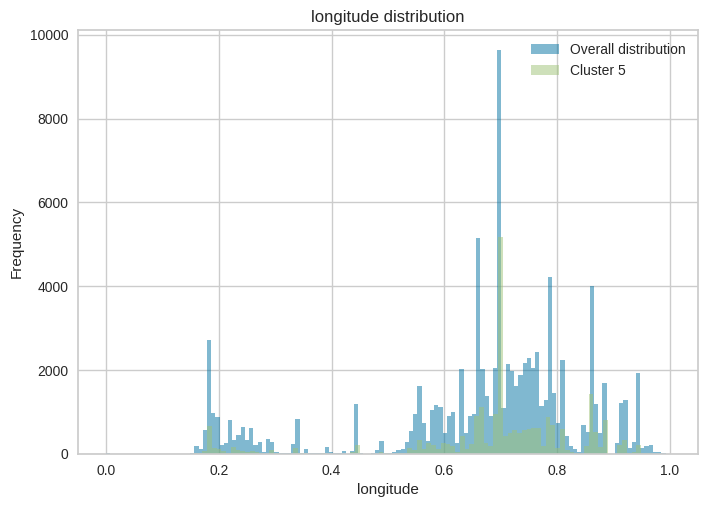

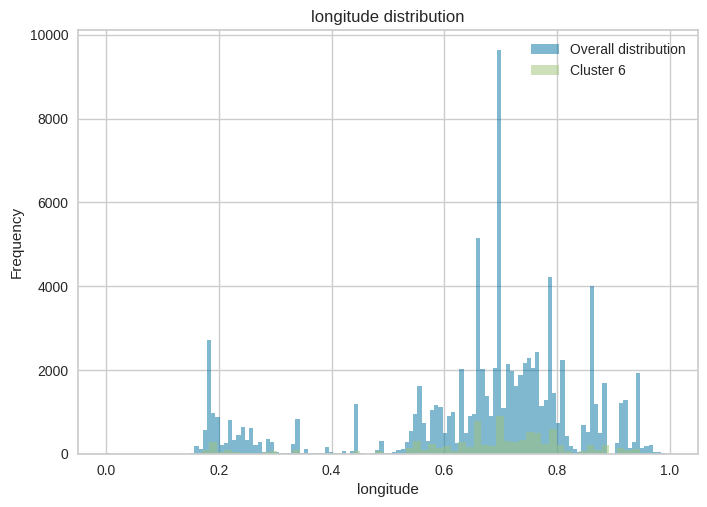

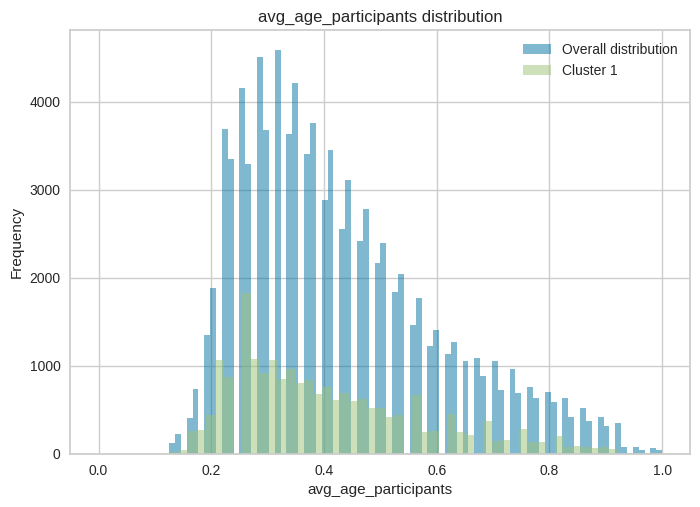

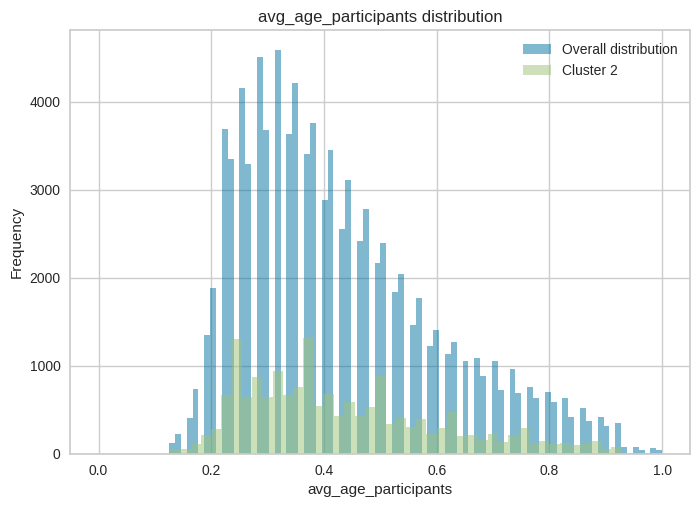

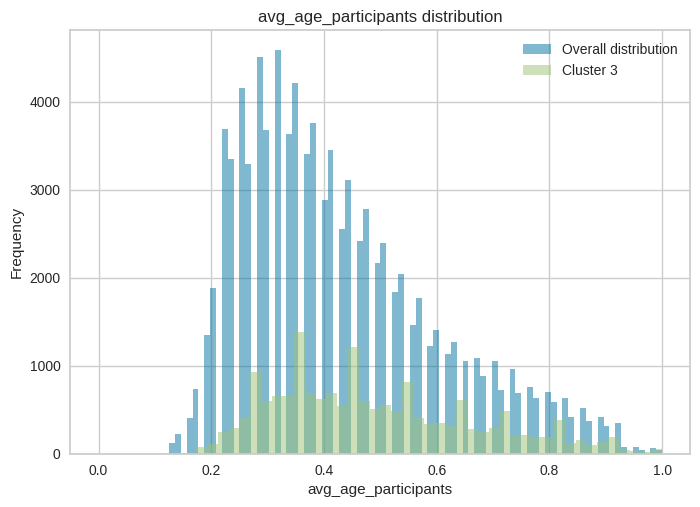

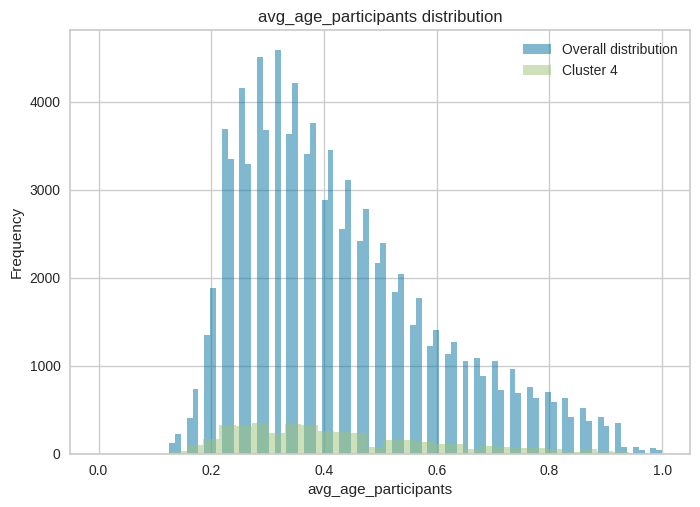

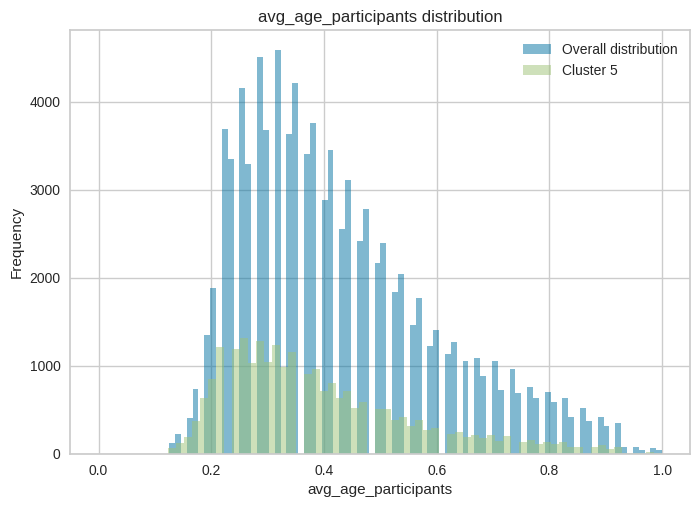

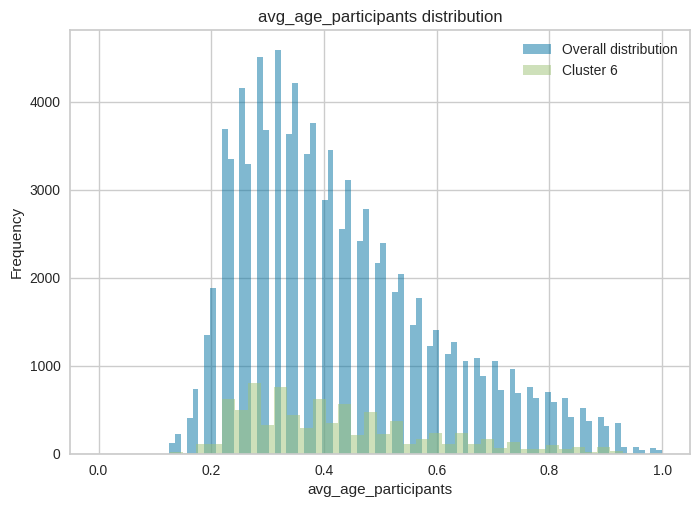

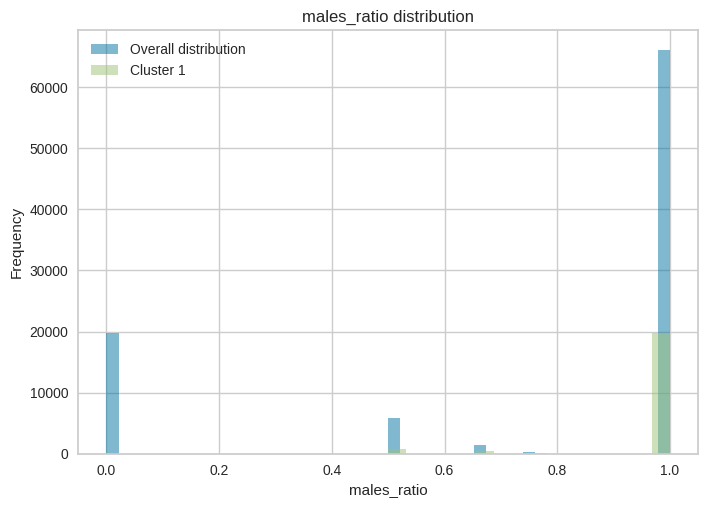

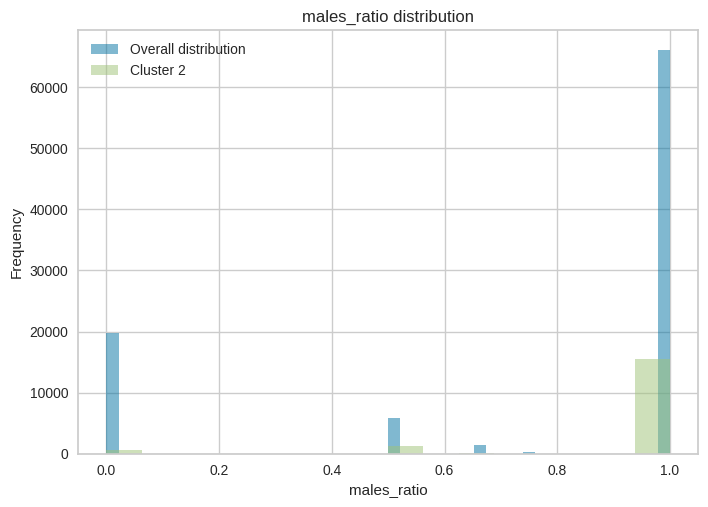

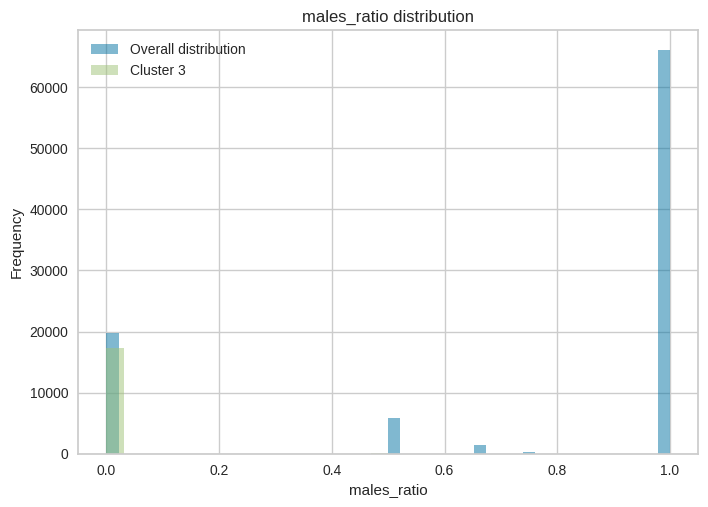

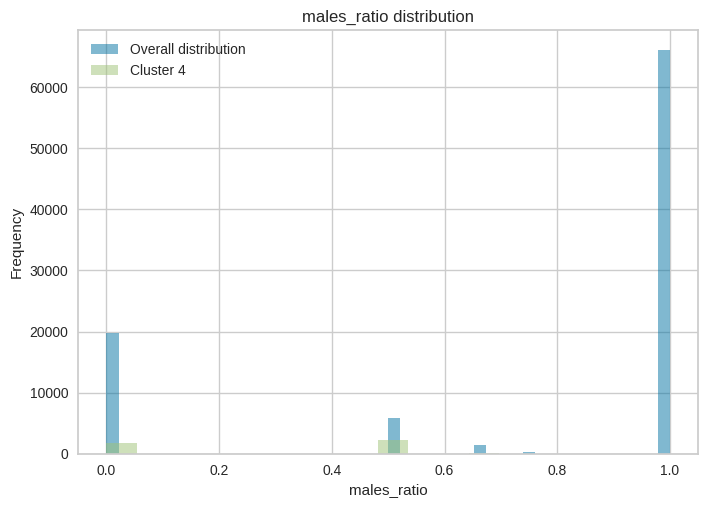

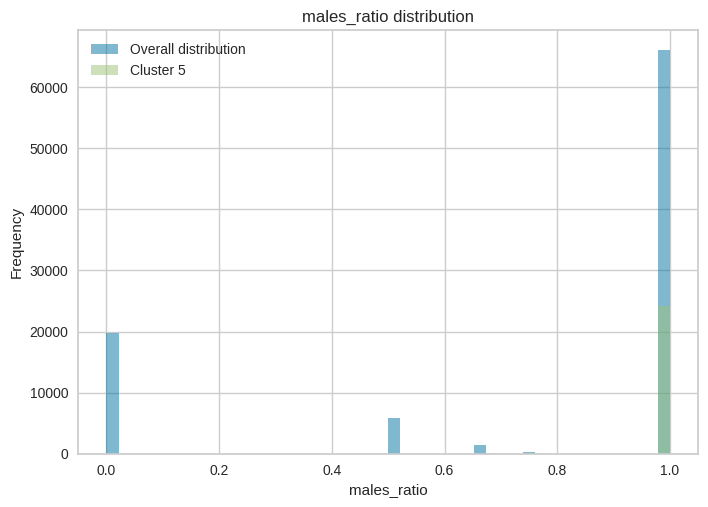

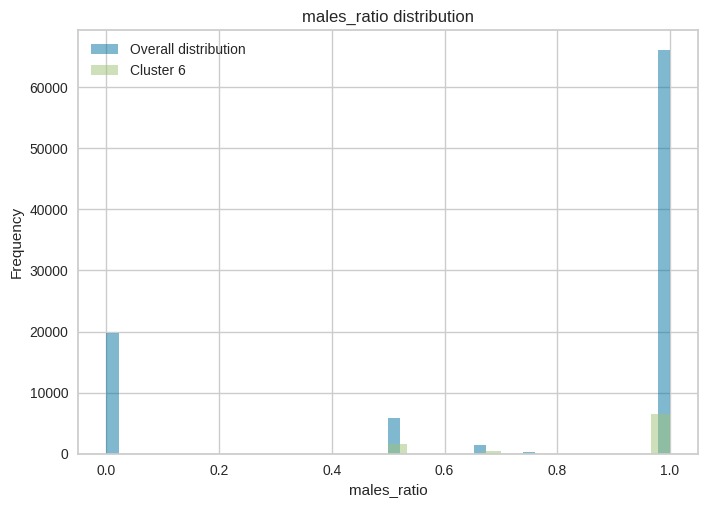

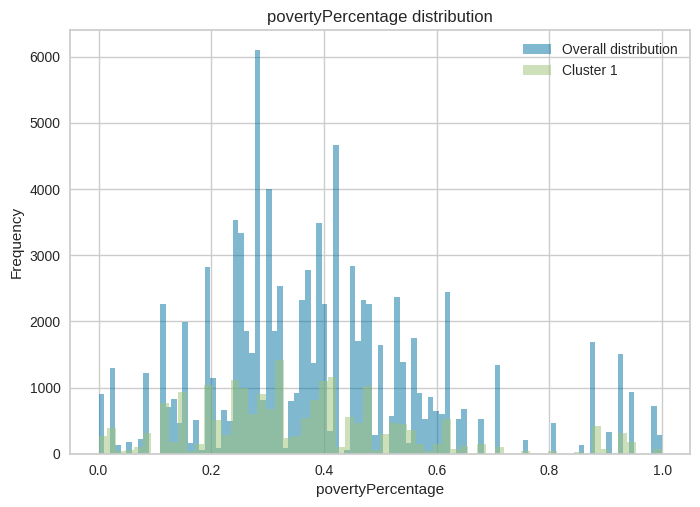

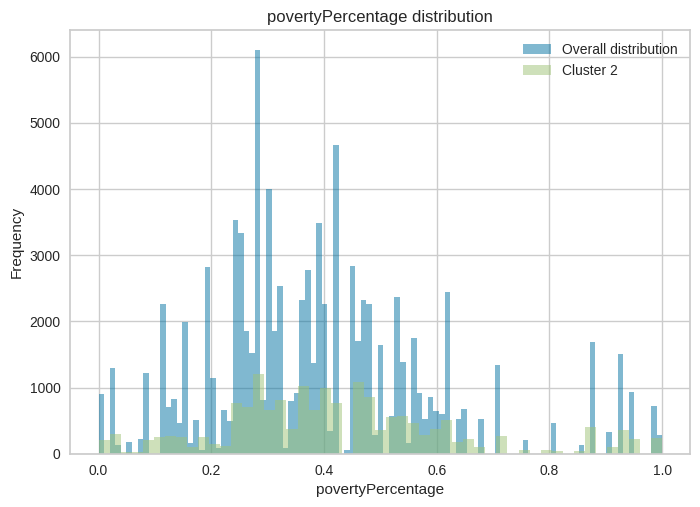

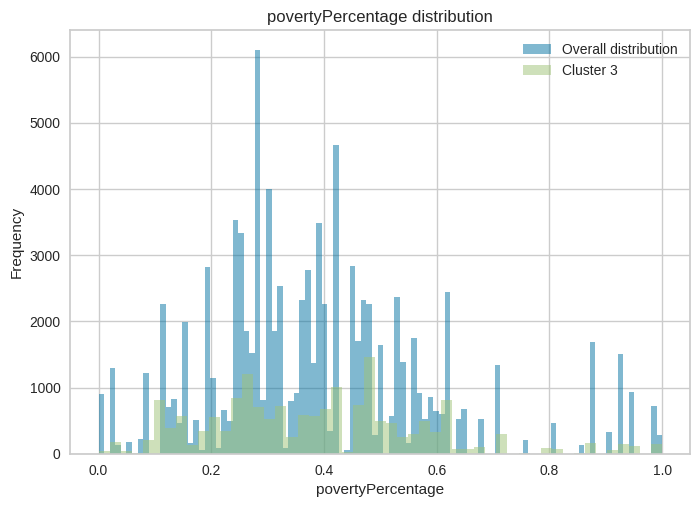

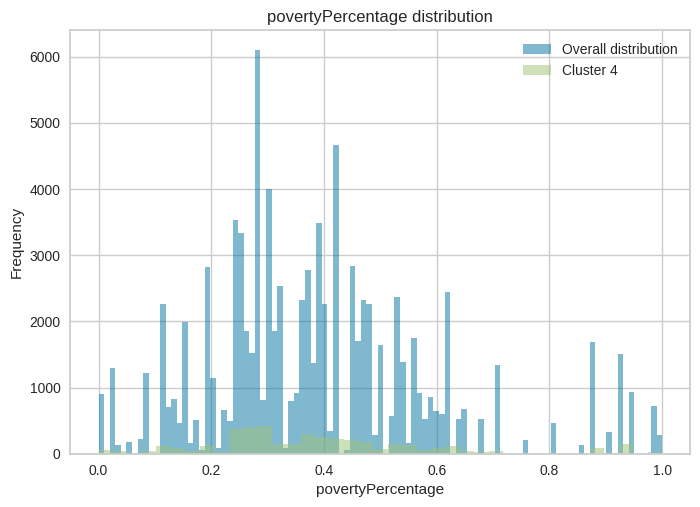

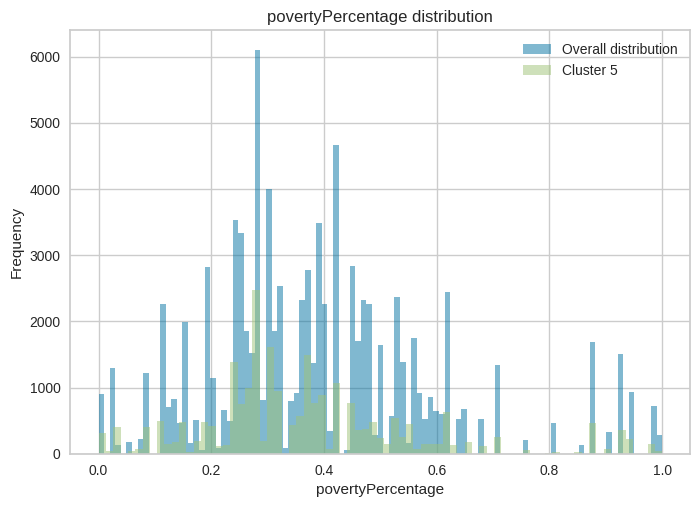

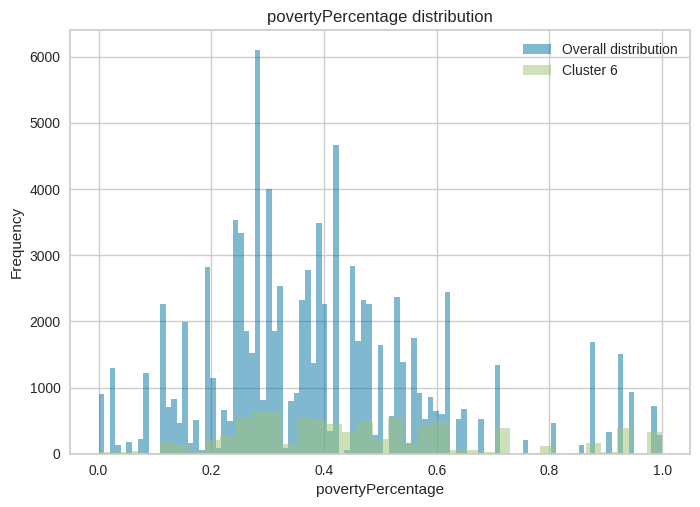

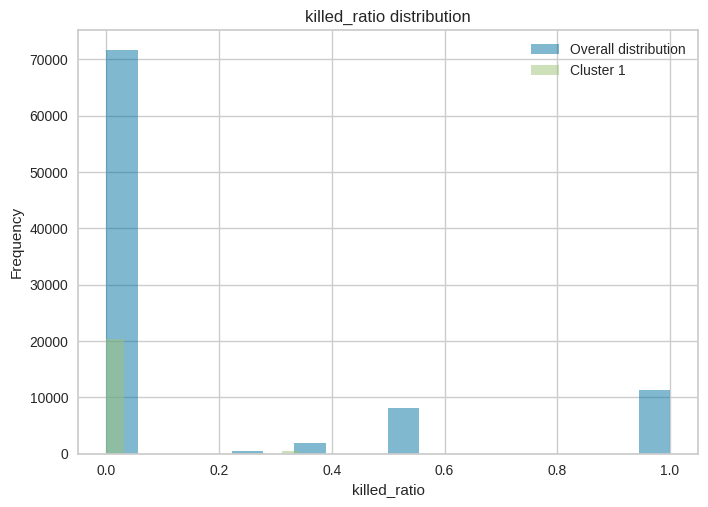

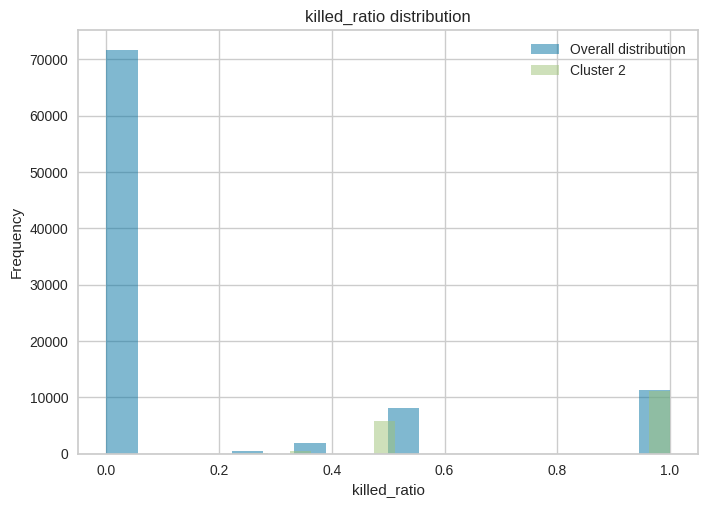

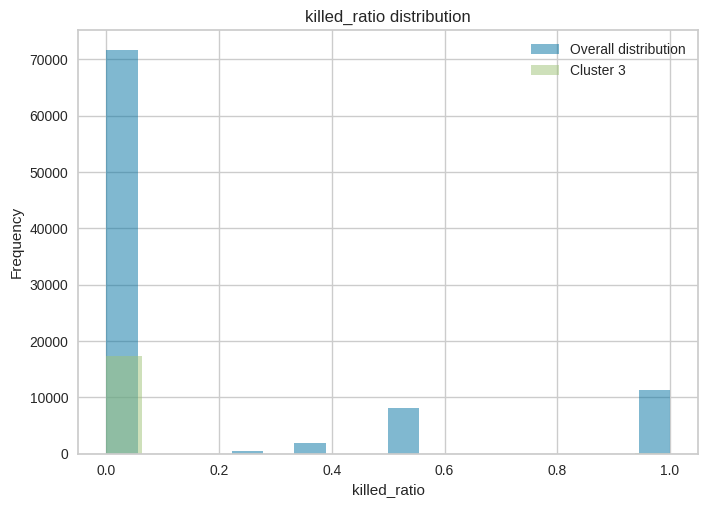

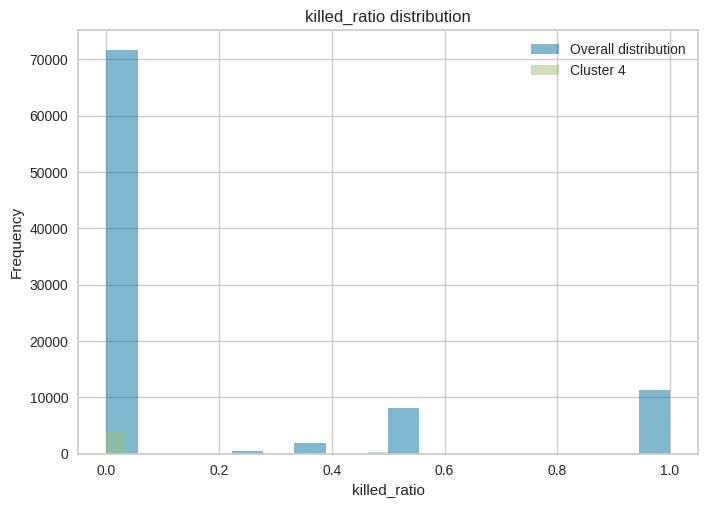

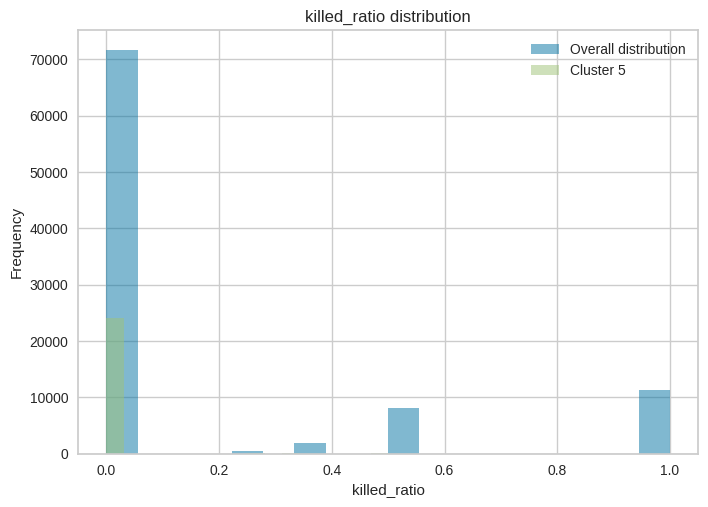

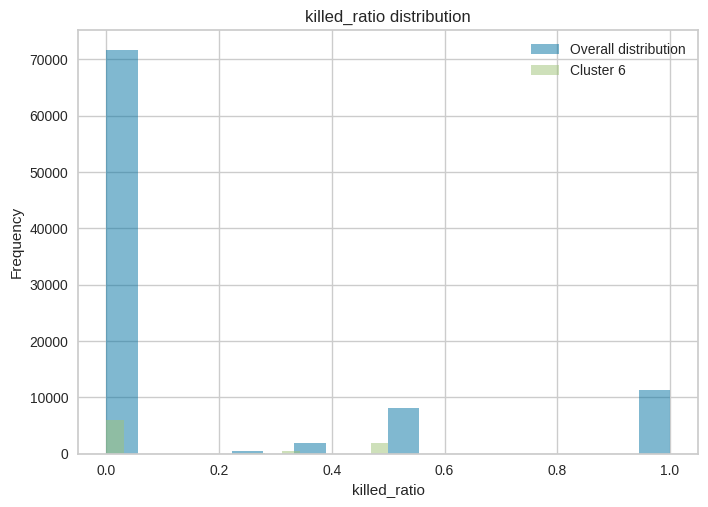

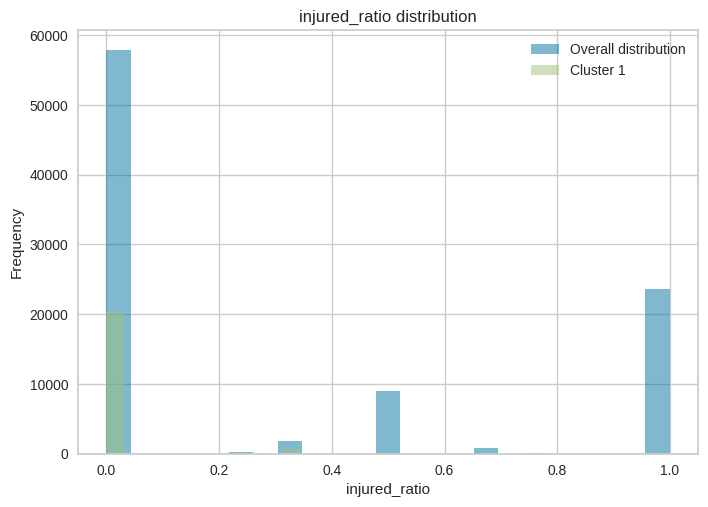

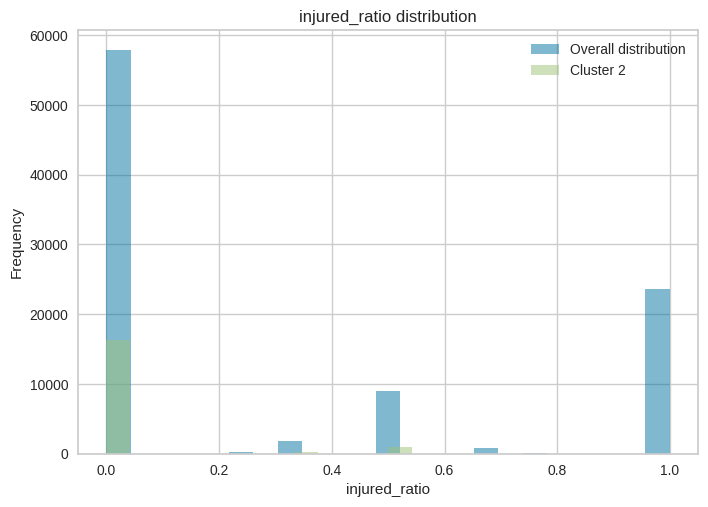

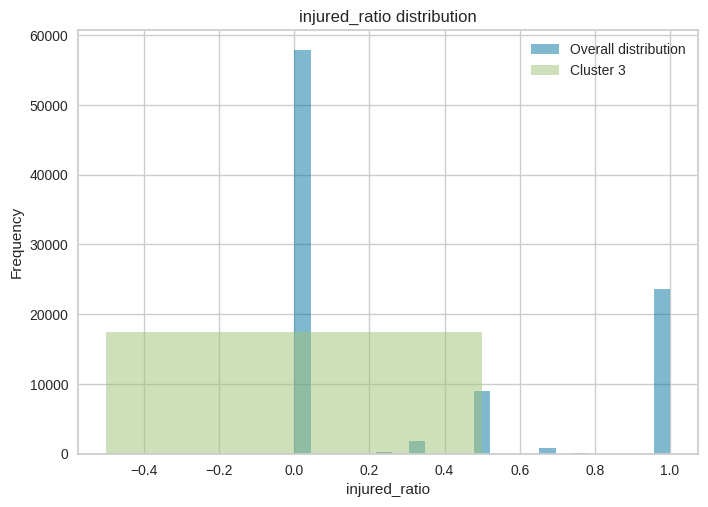

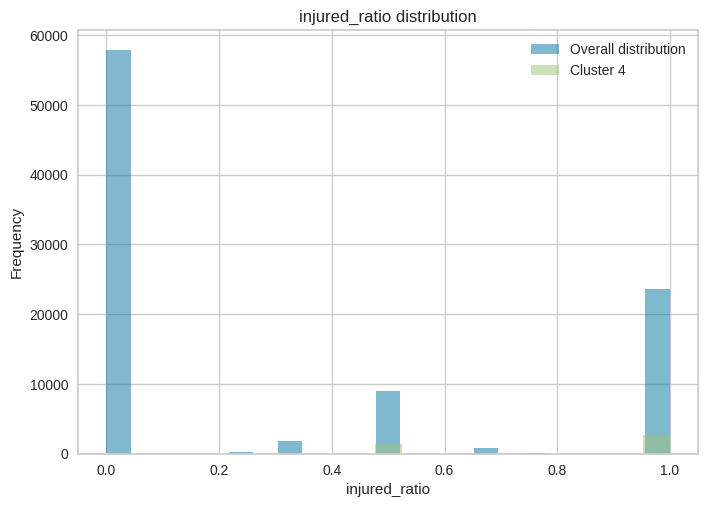

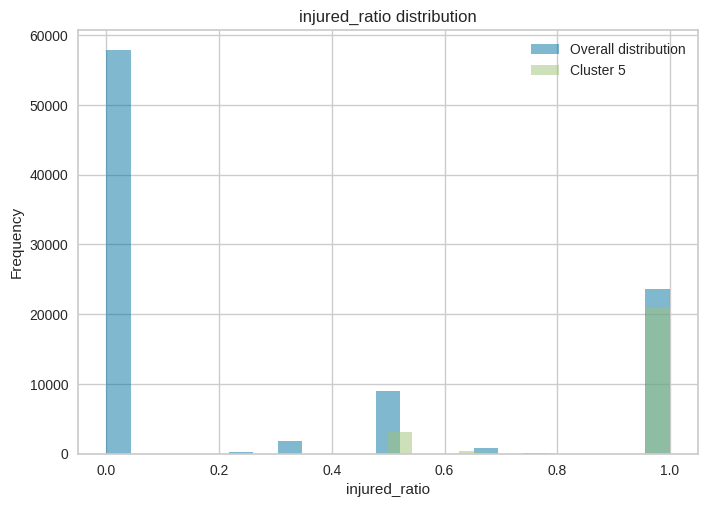

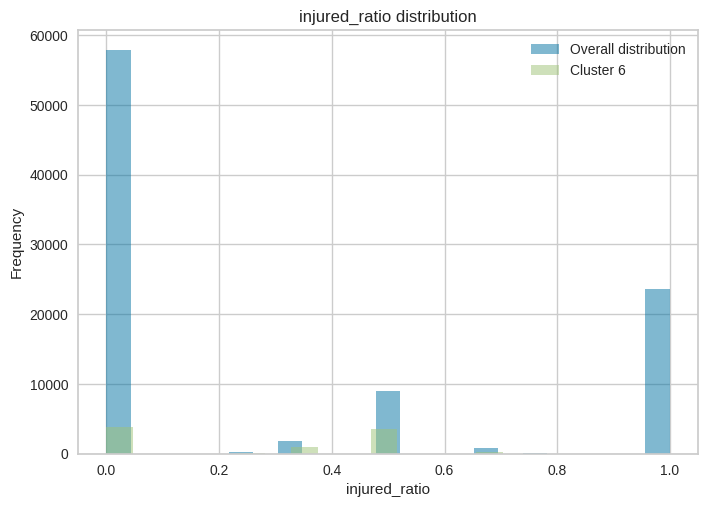

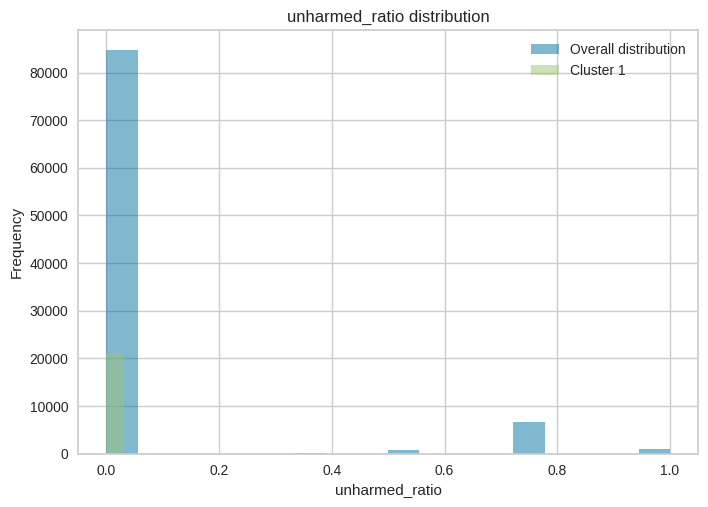

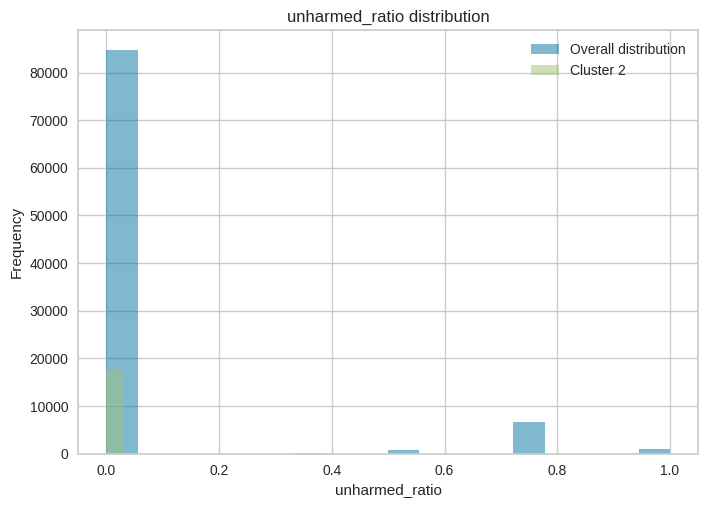

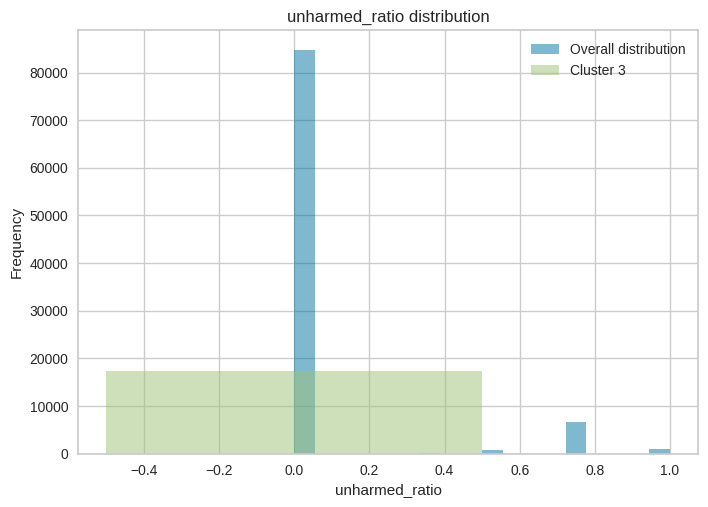

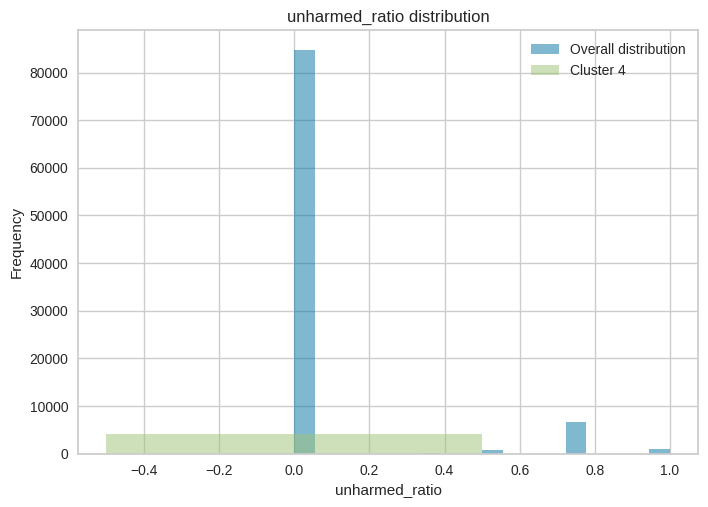

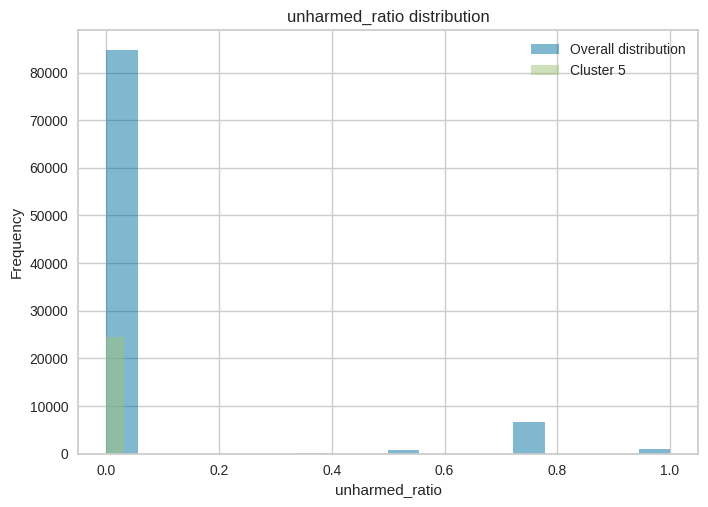

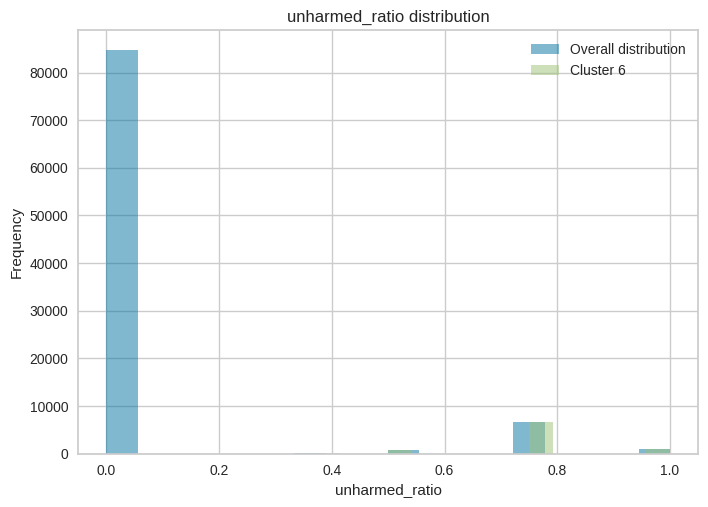

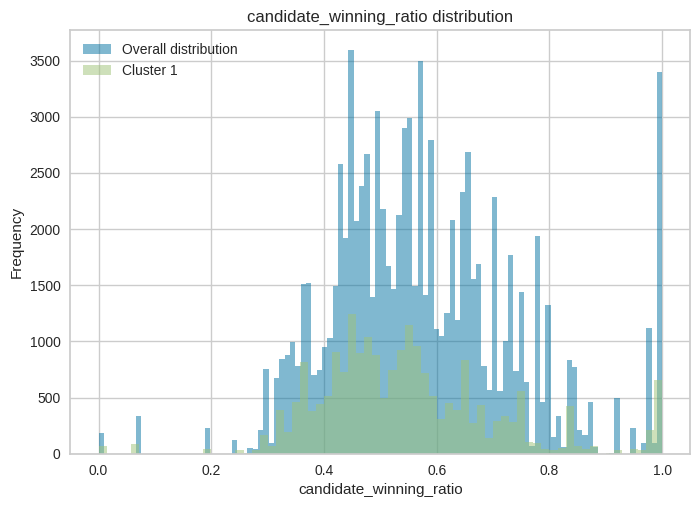

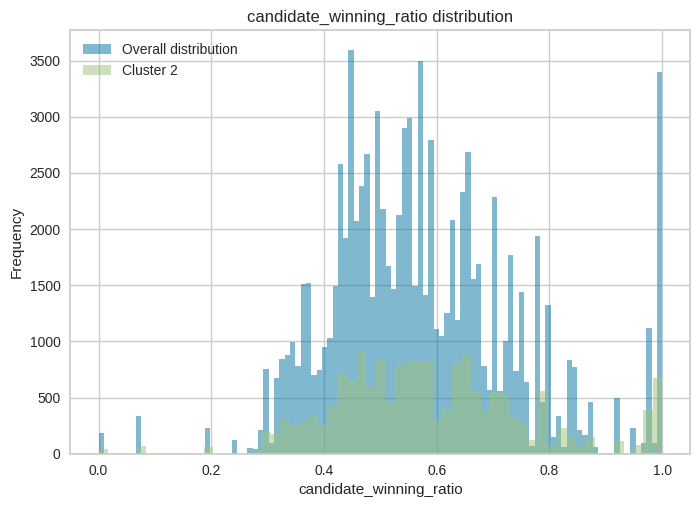

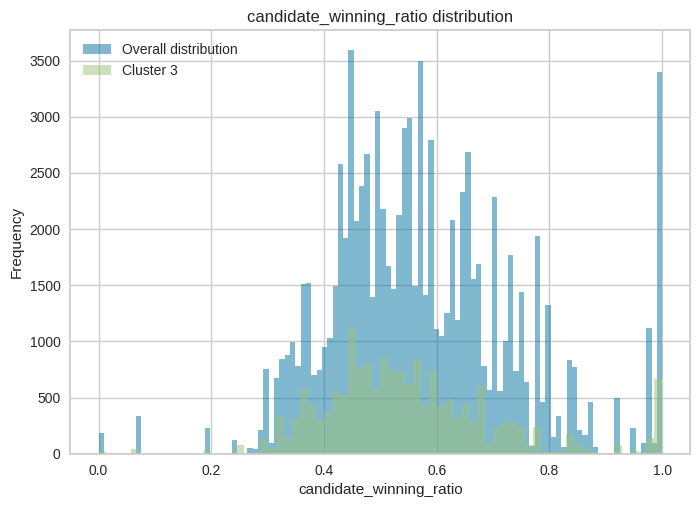

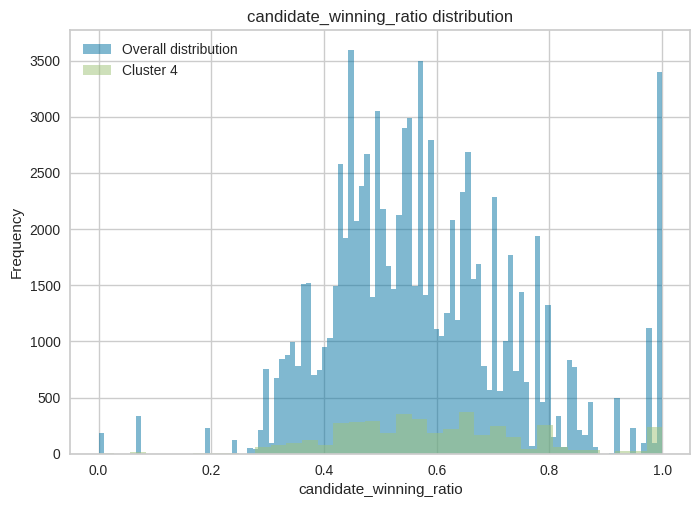

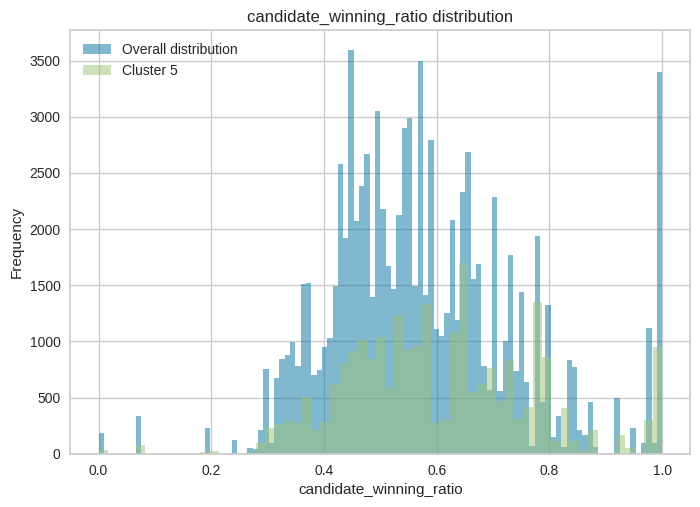

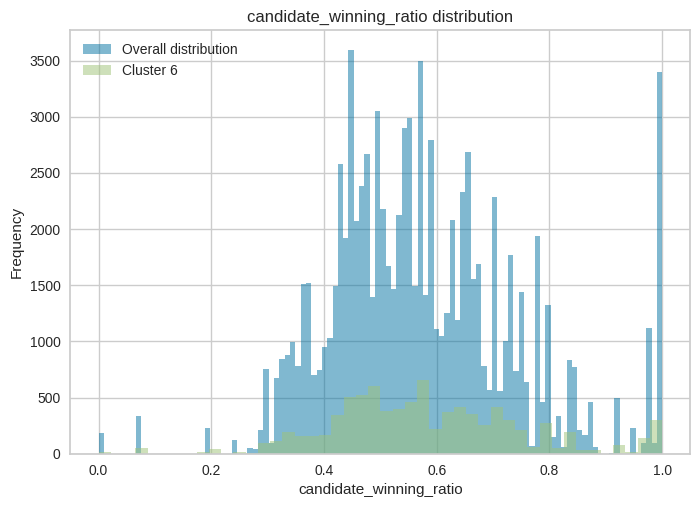

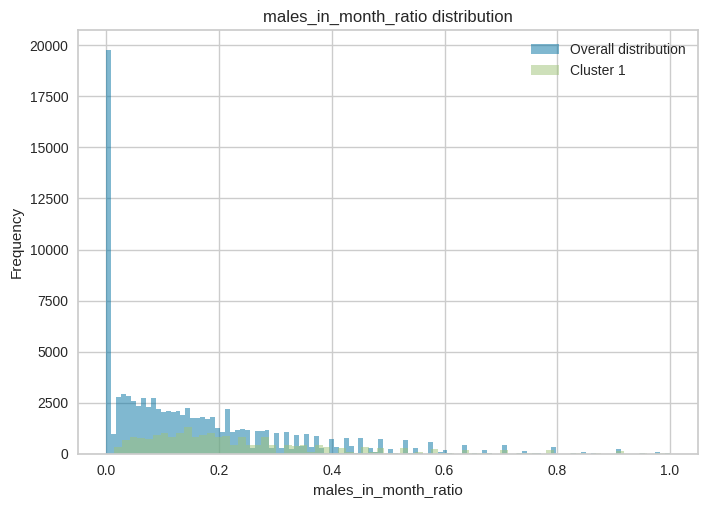

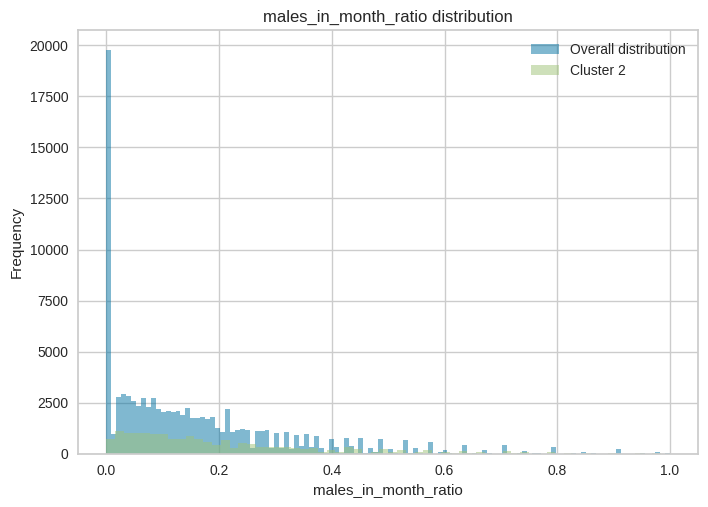

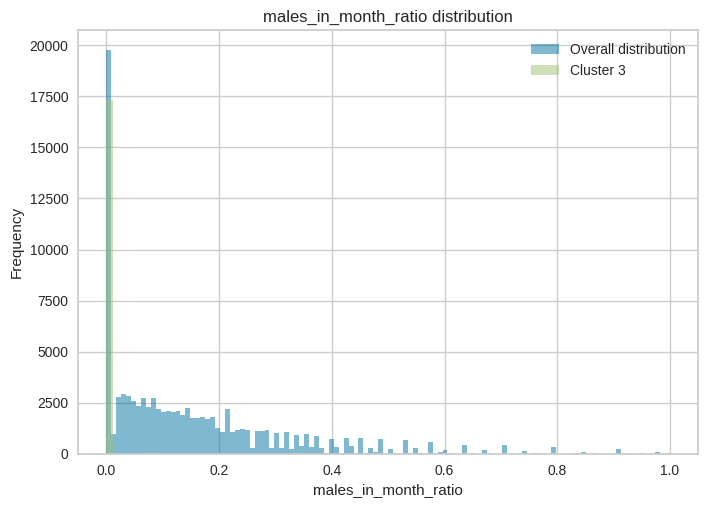

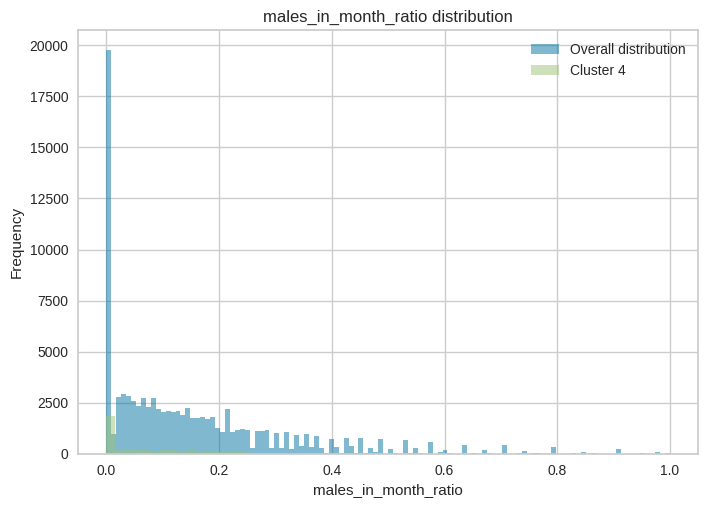

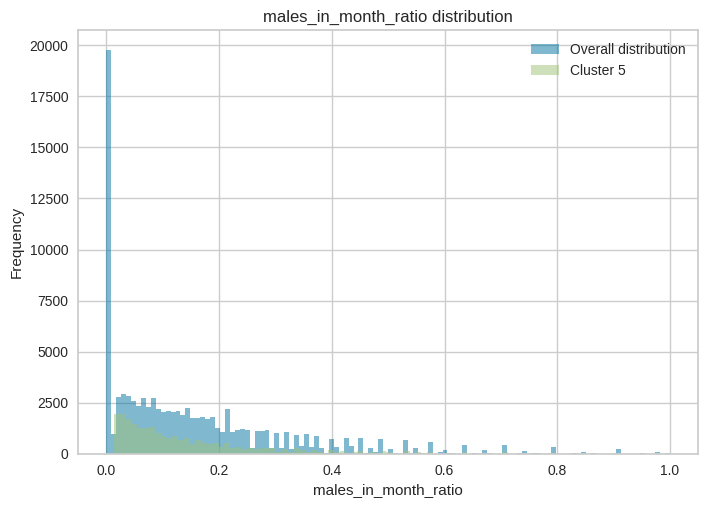

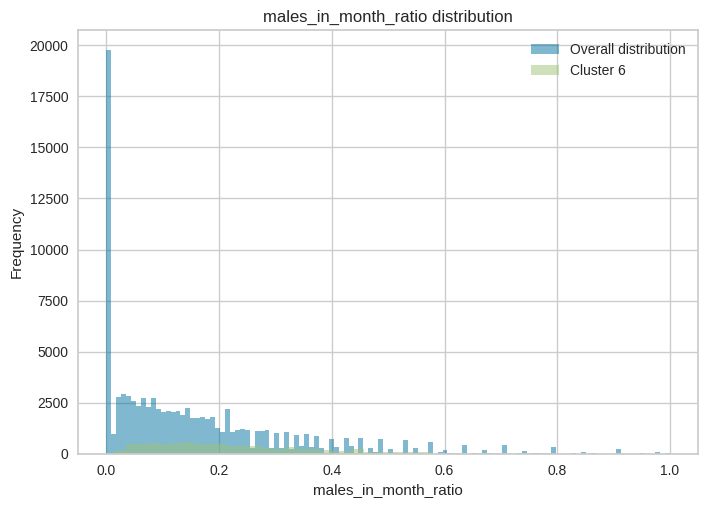

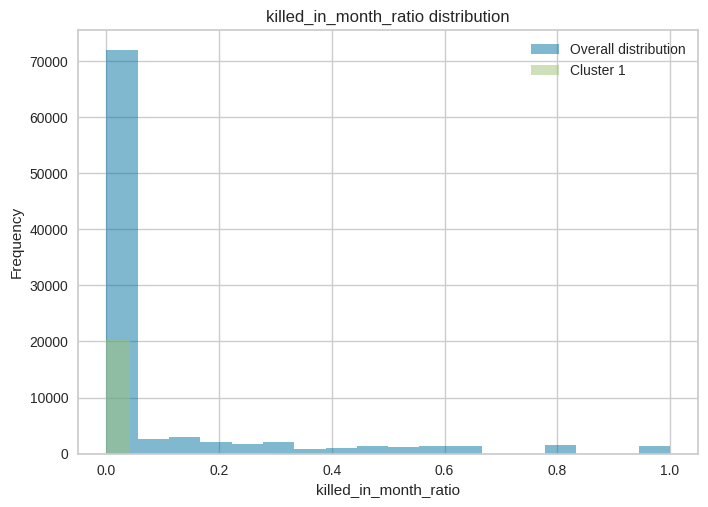

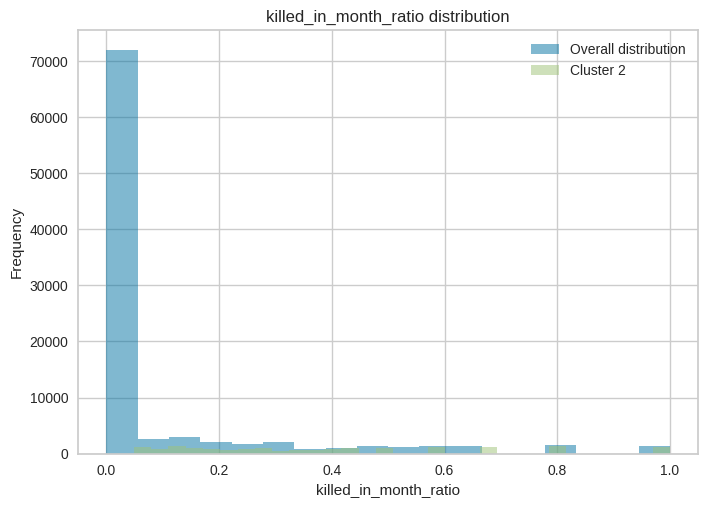

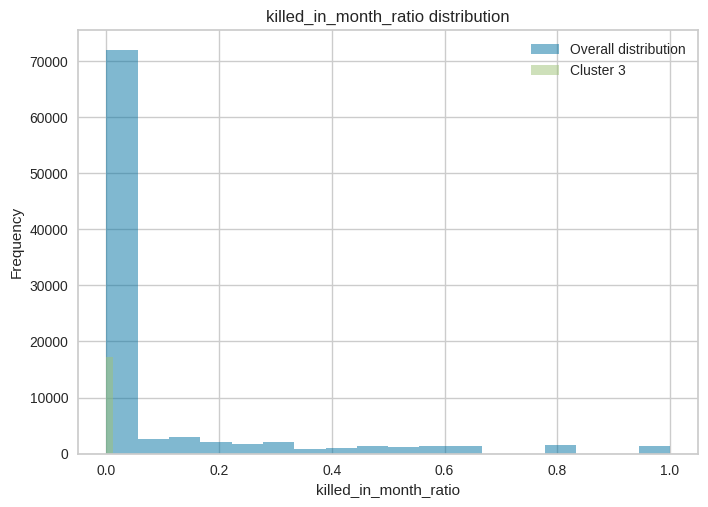

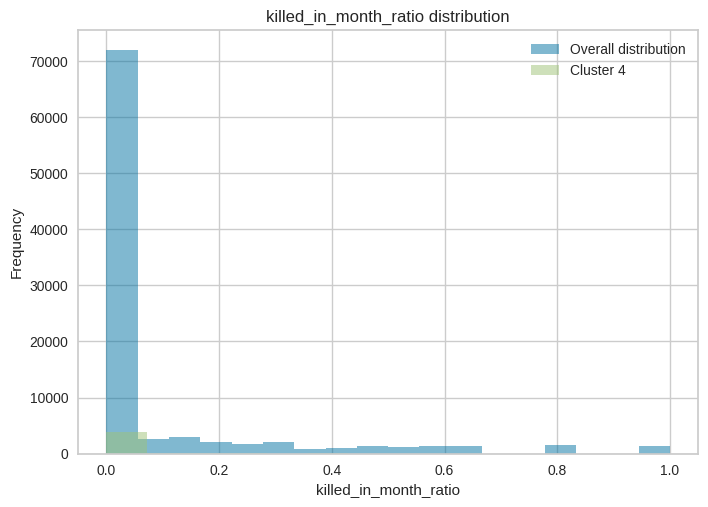

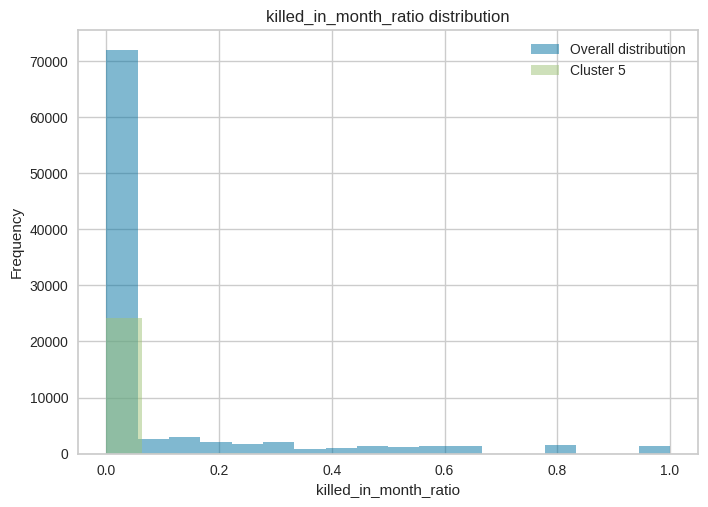

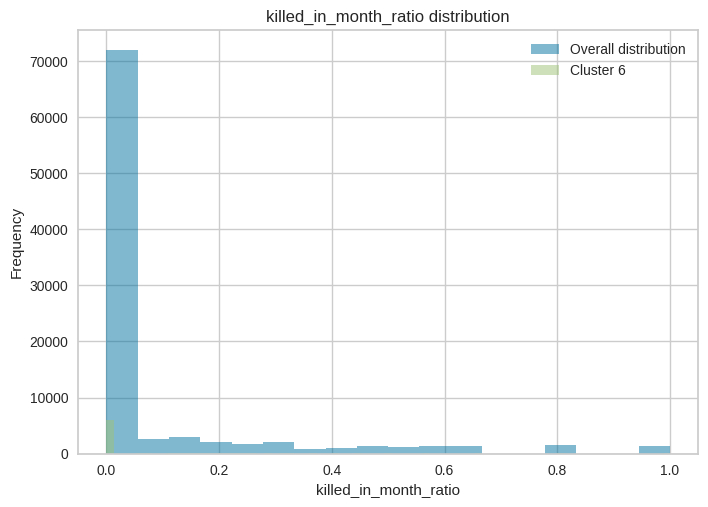

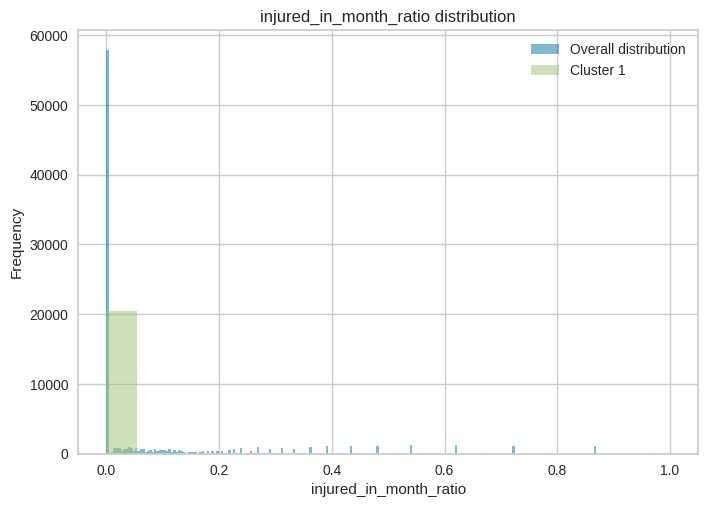

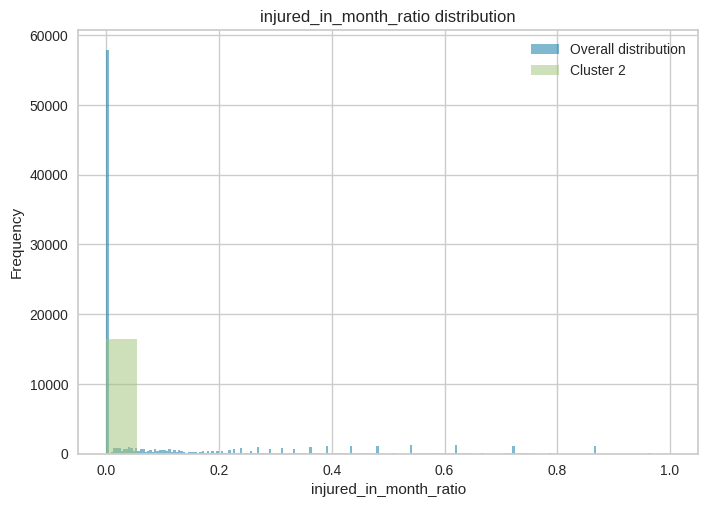

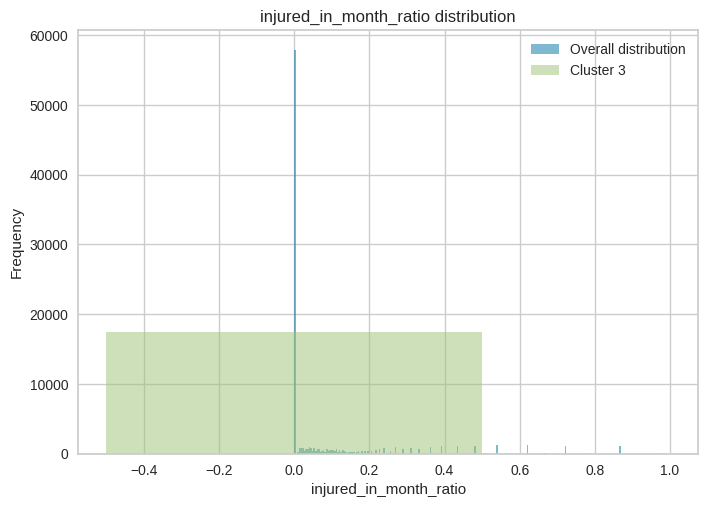

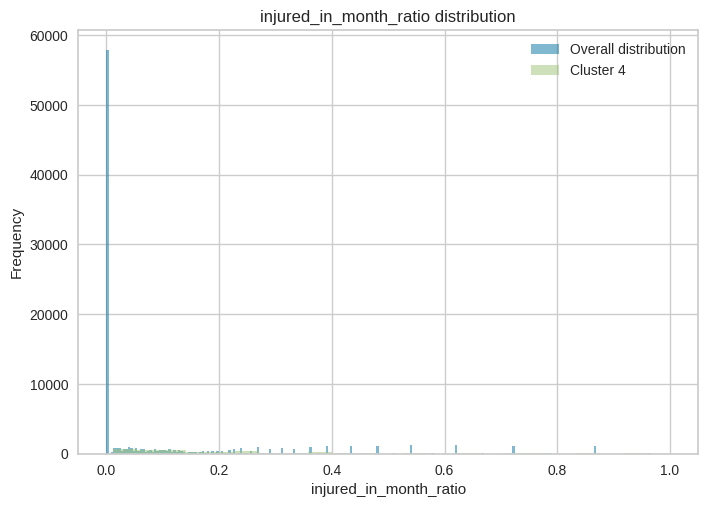

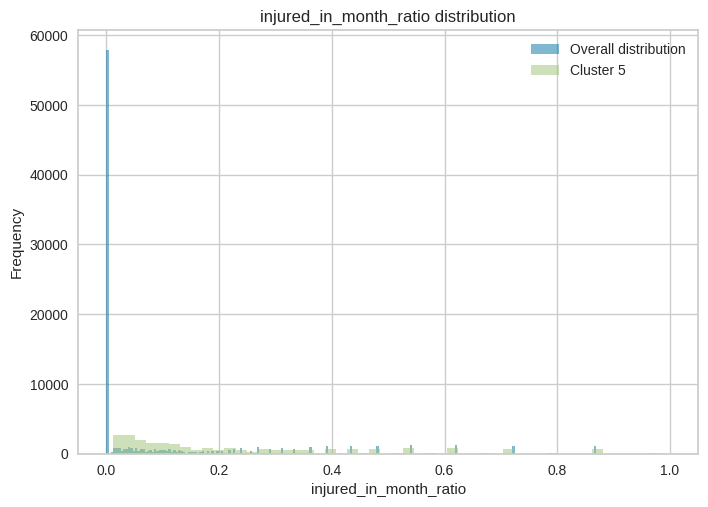

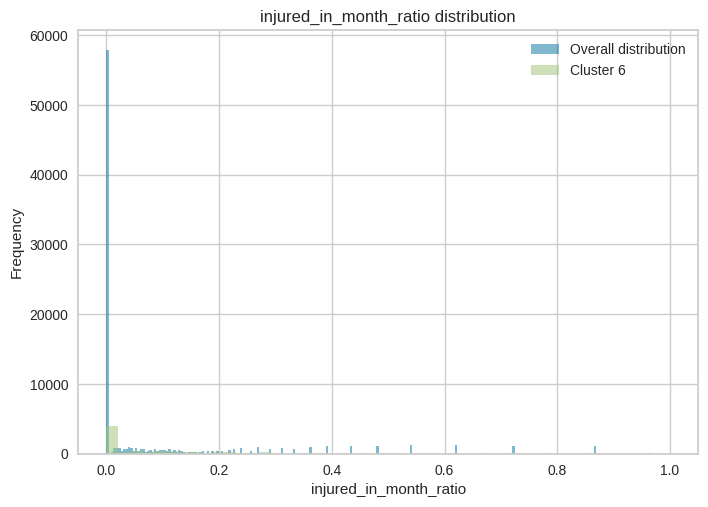

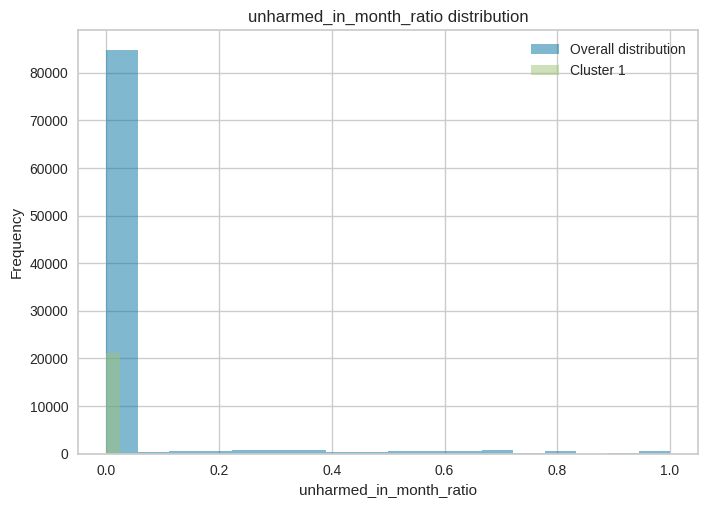

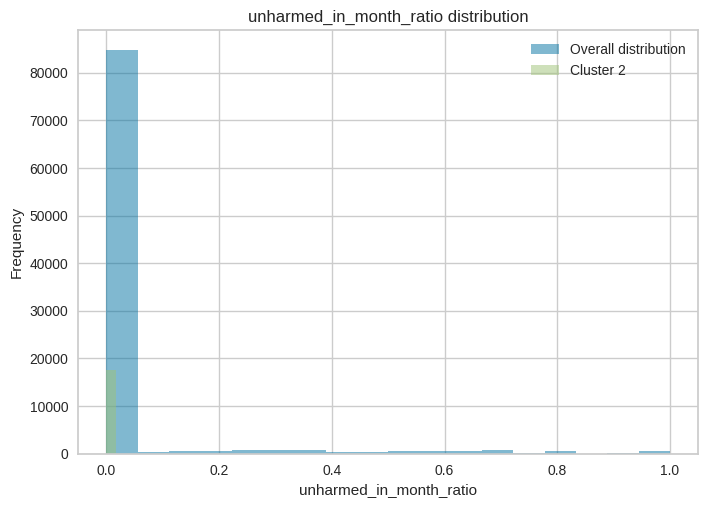

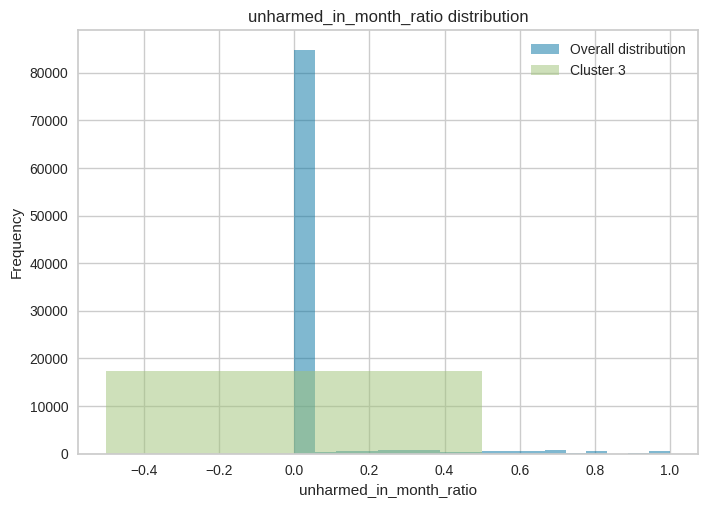

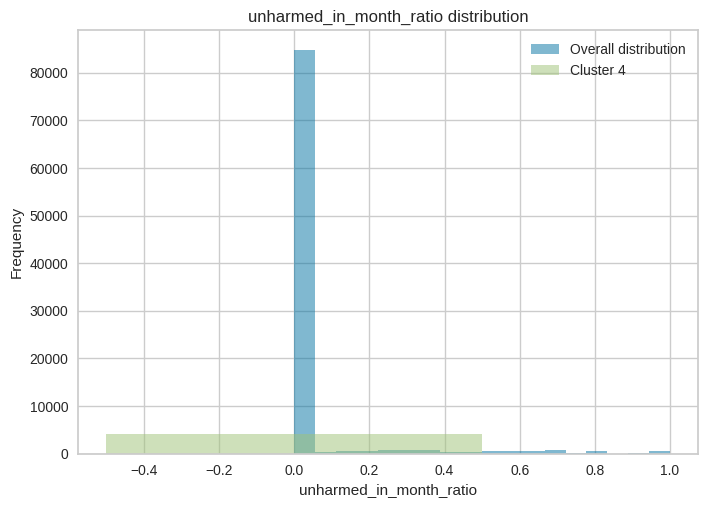

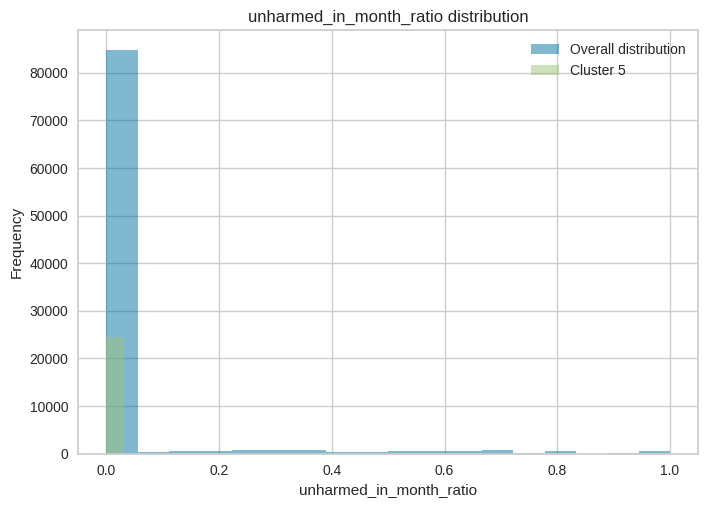

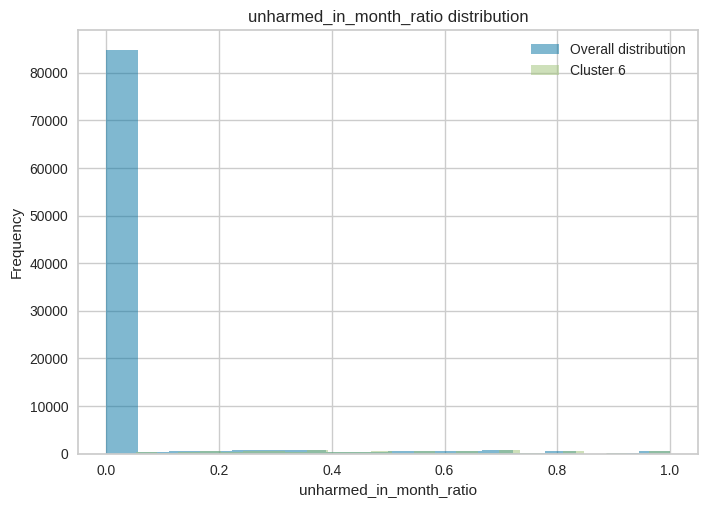

In [ ]:
# Perform K-means clustering with the optimal k value
k_optimal2 = 6
kmeans_6 = KMeans(n_clusters=k_optimal2)
kmeans_6.fit(X_normalized_minmax)
labels2 = kmeans_6.labels_

# Analyze the obtained clusters by calculating summary statistics for each variable within each cluster
for k in range(k_optimal2):
    cluster_data = X_normalized_minmax[labels2 == k]
    print('Cluster', k + 1)
    print(cluster_data.describe())

# Compare the distribution of variables within each cluster to the overall distribution of the variables in the entire dataset
for col in X_normalized_minmax.columns:
    all_data = X_normalized_minmax[col]
    for k in range(k_optimal2):
        cluster_data = X_normalized_minmax[labels2 == k][col]
        plt.hist(all_data, bins='auto', alpha=0.5, label='Overall distribution')
        plt.hist(cluster_data, bins='auto', alpha=0.5, label=f'Cluster {k + 1}')
        plt.title(f'{col} distribution')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()


In [ ]:
# Calculate silhouette score
silhouette_score_val2 = silhouette_score(X_normalized_minmax, labels2)
print(f'Silhouette score: {silhouette_score_val2:.2f}')

# Calculate Calinski-Harabasz score
calinski_harabasz_score_val2 = calinski_harabasz_score(X_normalized_minmax, labels2)
print(f'Calinski-Harabasz score: {calinski_harabasz_score_val2:.2f}')

Silhouette score: 0.37
Calinski-Harabasz score: 34532.89


In [ ]:
# Analyze the obtained clusters by calculating summary statistics for each variable within each cluster
for k in range(k_optimal2):
    cluster_data = X_normalized_minmax[labels2 == k]
    print('Cluster', k + 1, len(cluster_data))

Cluster 1 21104
Cluster 2 17498
Cluster 3 17435
Cluster 4 4205
Cluster 5 24482
Cluster 6 8624
